### 1. Introduction

This coursework aims to show how we can use LSTM models with different architectures to forecast pollution in the future in a ceratin city using a recurrent neural network model architecture.

This method could help meteorologists, CO2 emissions experts, governments and anti-pollution organizations to predict in a certain city how pollution rates change based on weather.

#### 1.1 Domain-specific area

With the rise in awareness towards air pollution and its adverse effects on the planet and human health. It has been crucial to take a close look at how pollution rates change within the year based on different weather conditions and to be able to forecast it in the future. It has been crucial even that now, some EU governments where pollution rates are high advise their vulnerable citizens against going outside without a face mask. Moreover, weather pollution rates are now integrated into weather apps and websites.

Due to weather data being widely available and abundant, it makes clear sense to use the new AI and Deep Learning techniques to predict weather pollution rates. Weather forecasting has always been the main concern of meteorologists to provide an accurate outlook on the temperature in the following days or even weeks. The most used models start from time series statistical models such as ARIMA and SARIMA models to deep learning models such as LSTM, Dense Layered Neural Networks, and Conv1D models. We make use of this knowledge and focus on the Recurrent Neural Network Models (RNN models) by utilizing the LSTM model to forecast a sequence of data points in the future.

Our aim is to forecast air pollution rates based on previous data points using a univariate multi-step LSTM model. This model will solely forecast the pollution without looking at other features. We then extend this model by incorporating the weather dataset features to enhance our model's evaluation metrics which would be discussed in the Measure of Success section. This model would provide an accurate prediction of the pollution rates for a certain city which then could be integrated into civilian warning apps or weather forecasting apps and outlets. We also compare different models such as Densely Connected Neural Networks, LSTM, and Conv1D.




#### 1.2 Objectives

The objective of our project is to find a suitable artificial neural network architecture as a classification algorithm which would provide news outlets with predicting the news articles' category from its headline and abstract with a click of a button. The objectives of the report could be summarised as follows: 


1. Finding a dataset from real life which would provide the basis for training our model.
2. Exploring key features for the dataset using EDA techniques.
3. Building a Dense Connected Neural Network as a baseline model.
4. Building an RNN LSTM Model which should yield better results than the Dense Connected Neural Network.
5. Overfitting the LSTM model and then applying regularization techniques.
6. Applying Hyperparameter tuning to our models to choose the best set of parameters.
7. Showing that Convolutional Neural Network (1D) could be a faster and cheaper alternative to LSTMs.
8. Integrating Multivariate Features to forecast using the above models again.
9. Evaluating all models using the RMSE, MSE, MAE metrics.


It is important to go through multiple Deep learning architectures as there is no silver bullet model for machine learning problems. Thus as data scientists, it is our task to search our modelling toolbox and find an optimum and efficient way to classify articles into their corresponding categories. Thus we would try different combinations of algorithms and numerical representations of text to find the optimum combo.

#### 1.3 Dataset 

In this coursework, we will be using the "Air Pollution Forecasting Dataset" which provides us with a huge amount of data that consists of 43800 data points. The dataset is provided by Rupak Roy and uploaded on Kaggle. This dataset was gathered from 2010-01-02 00:00:00
to 2014-12-31 23:00:00 and obtained from the US Embassy in Beijing, China. Hourly data was collected from the US embassy to measure air quality in Beijing. The dataset can be used to perform a wide variety of tasks due to its immense corpus which is categorized by article. Each row in this dataset consists of 6 features:

*pollution * (float): the pollution rate, called also PM2.5 concentration.

*dew* (Int): The Dew Point is the temperature which signifies the amount of water vapour that would turn into liquid water at some certain pressure.

*Temp* (float): The temperature in Celsius.

*press* (float): Pressure in bar.

*wnd_dir* (String): The Direction of the wind flow. It takes values SE (South East), NW (North West), NE (North East), and CV which stand for calm and variable wind direction.

*wnd_spd* (float): The speed of wind in m/s.

*snow* (Int): the precipitation of snow.

*rain* (Int): the precipitation of rain.

*date* (Date): the date of the reading at a particular time and date. The date follows the format (YYYY/MM/DD HH:mm:ss). This column has been used as an index for our dataset.

Our dataset contains 0 duplicate rows and 0 NaN or Null values making it a great candidate for our topic.

 #### 1.4 Measure of Success

Mean squared error (MSE), mean absolute error (MAE), and root mean squared error (RMSE) are commonly used metrics for evaluating the performance of our forecasts.

MSE is a measure of the average squared difference between the foretasted and actual values of a the model. To calculate the MSE, you take the difference between each forecasted value and the actual value then you square it, and then average the results. The formula for MSE is:

MSE = 1/n * ∑(y - ŷ)²

where n is the number of observations, y is the actual value, and ŷ is the foretasted value.

MAE is a measure of the average absolute difference between the foretasted and actual values of the model. To calculate the MAE, you take the absolute difference between each foretasted value and the actual value, and then average the results. The formula for MAE is:

MAE = 1/n * ∑|y - ŷ|

RMSE is a measure of the average distance between the foretasted and actual values of a model, taking into account the squared differences between the two. It is simply the square root of the MSE. The formula for RMSE is:

RMSE = sqrt(1/n * ∑(y - ŷ)²)

We will be using all three metrics to compare the models built by LSTM, the baseline model, Conv1D Model and the overfitted LSTM.

### 2. Implementation

Now we will focus on the technical development part we will first, import our python libraries which would help us with encoding our categorical values to be transformed to numerical values and the application of data scaling technique to let all the features vary within defined range. Also, we import the libraries for data visualization such as matplotlib.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from keras.utils import plot_model
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError, MeanAbsoluteError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam
from keras.models import load_model
import tensorflow as tf
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### 2.1 EDA

In this subsection, we focus on exploring our dataset visually by plotting the features we have.


At first, we read our dataset which we downloaded from Kaggle. The file format follows the CSV format. A CSV file is formatted as a comma-seperated file where the first line contains the column names and the data points follow on the consecutive lines. For example, a single row is given by the following format: 

date, pollution, dew, temp, press, wnd_dir, wnd_spd, snow, rain

1/2/2010  12:00:00 AM, 129, -16, -4, 1020, SE, 1.79, 0,0

In [ ]:
dataframe=pd.read_csv('/content/LSTM-Multivariate_pollution.csv',  header=0, index_col=0)
display(dataframe.tail()) 
dataframe.info()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0
2014-12-31 22:00:00,8.0,-22,-4.0,1034.0,NW,246.72,0,0
2014-12-31 23:00:00,12.0,-21,-3.0,1034.0,NW,249.85,0,0


<class 'pandas.core.frame.DataFrame'>
Index: 43800 entries, 2010-01-02 00:00:00 to 2014-12-31 23:00:00
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pollution  43800 non-null  float64
 1   dew        43800 non-null  int64  
 2   temp       43800 non-null  float64
 3   press      43800 non-null  float64
 4   wnd_dir    43800 non-null  object 
 5   wnd_spd    43800 non-null  float64
 6   snow       43800 non-null  int64  
 7   rain       43800 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 3.0+ MB


In [ ]:
dataframe.isnull().sum()

pollution    0
dew          0
temp         0
press        0
wnd_dir      0
wnd_spd      0
snow         0
rain         0
dtype: int64

In [ ]:
dataframe["wnd_dir"].unique()

array(['SE', 'cv', 'NW', 'NE'], dtype=object)

#### 2.1.1 Visualizations
Let's have a look at how each of these features vary across time. We can see  clearly below that the numerical features exhibit some sort of seasonality which makes sense as the weather some sort of repeats each year without drastic differences. Also the dataset seems to be stationary with a similar average mean and standard deviation.

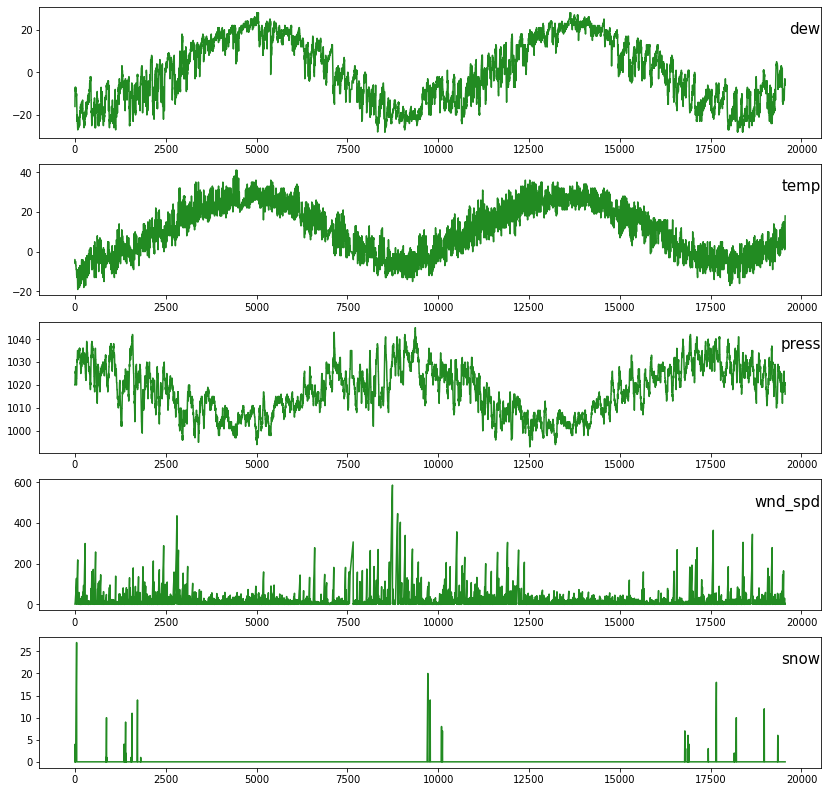

In [ ]:
values = dataframe.values

# specify columns to plot
groups = [1, 2, 3, 5, 6]
i = 1

# plot each column
plt.figure(figsize=(14,14))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group], c = "forestgreen")
    plt.title(dataframe.columns[group], y=0.75, loc='right', fontsize = 15)
    i += 1
plt.show()

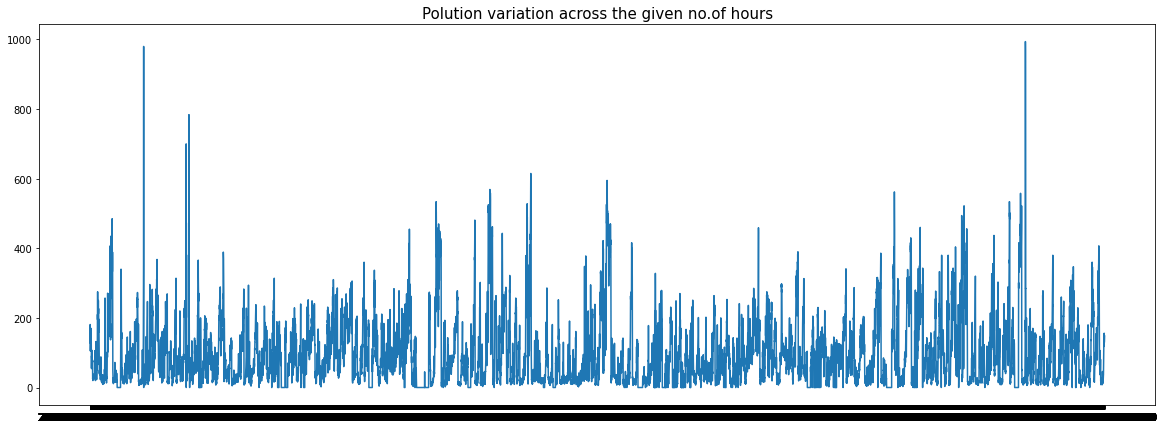

In [ ]:
fig = plt.figure(figsize = (20,7))
plt.plot(dataframe.pollution)
plt.title("Polution variation across the given no.of hours", fontsize = 15)
plt.show()

### 3. Data Preparation

####3.1 Label Encoding

Label Encoding is a technique used to convert categorical variables into numerical values. This conversion is achieved by assigning a unique integer value to each category. However, these numerical values hold no inherent meaning, and they do not indicate any ranking or ordinal relationship between the categories. Therefore, any mathematical operations performed on these values would be meaningless, and the order does not convey any particular significance. For instance, if the category NE is assigned the numerical value of '0' and NW is assigned '1', this does not imply that NW is more important or dominant than NE.

In [ ]:
# word encoding of wnd_dir column
encoder = LabelEncoder()
dataframe['wind_dir']= encoder.fit_transform(dataframe['wnd_dir'])
labelEncoder_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print('Label Encoder Mapping of the names:', labelEncoder_name_mapping)

Label Encoder Mapping of the names: {'NE': 0, 'NW': 1, 'SE': 2, 'cv': 3}


In [ ]:
new_dataframe = dataframe.drop(columns=['wnd_dir'])
display(new_dataframe.head())

,pollution,dew,temp,press,wnd_spd,snow,rain,wind_dir
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0,2
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0,2
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0,2
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36,1,0,2
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25,2,0,2


In [ ]:
pollution=dataframe['pollution'].values
dew=dataframe['dew'].values
temperature=dataframe['temp'].values
pressure=dataframe['press'].values
wind_speed=dataframe['wnd_spd'].values
snow=dataframe['snow'].values
rain=dataframe['rain'].values
wind_direction=dataframe['wind_dir'].values

We see that the Pollution column ranges from 0.0 to 994.0, Dew from -40 to 28, Temprature from -19 to 40, Pressure from 991 to 1046, Wind Speed from 0.45 to 585.6, snow from 0 to 27 ,rain from 0 to 36 and lastly our 4 wind direction categories which are 'NE': 0, 'NW': 1, 'SE': 2, 'cv': 3

In [ ]:
print("Pollution max value: ", max(pollution))
print("dew max value: ", max(dew))
print("temperature max value: ", max(temperature))
print("pressure max value: ", max(pressure))
print("wind max value: ", max(wind_speed))
print("snow max value: ", max(snow))
print("rain max value: ", max(rain))
print("wind_direction max value: ", max(wind_direction))

Pollution max value:  994.0
dew max value:  28
temperature max value:  42.0
pressure max value:  1046.0
wind max value:  585.6
snow max value:  27
rain max value:  36
wind_direction max value:  3


In [ ]:
print("Pollution min value: ", min(pollution))
print("dew min value: ", min(dew))
print("temperature min value: ", min(temperature))
print("pressure min value: ", min(pressure))
print("wind min value: ", min(wind_speed))
print("snow min value: ", min(snow))
print("rain min value: ", min(rain))
print("wind_direction min value: ", min(wind_direction))

Pollution min value:  0.0
dew min value:  -40
temperature min value:  -19.0
pressure min value:  991.0
wind min value:  0.45
snow min value:  0
rain min value:  0
wind_direction min value:  0


#### 3.2 Data Scaling

Scaling refers to the process of adjusting the data values to fit within a certain range, often between 0 and 1. The preferred technique for this task is the Min-Max Scaling method, which scales the data to a specified range where the minimum value is 0 and the maximum value is 1. By default, the MinMaxScaler uses the range [0,1], but it can be customized if necessary. In this case, we will stick to the default range [0,1] and not modify it.

In [ ]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1), copy= True)
scaled_dataframe = scaler.fit_transform(new_dataframe)
# to retain the columns headers as they are not numbers because MinMaxScaler() transforms it to numbers
scaled_dataframe = pd.DataFrame(scaled_dataframe, columns = new_dataframe.columns)

In [ ]:
scaled_dataframe.index=new_dataframe.index
# scaled_dataframe.index=pd.to_datetime(new_dataframe.index)
print(type(scaled_dataframe))
display((scaled_dataframe))

# def normalize(data, train_split):
#     data_mean = data[:train_split].mean(axis=0)
#     data_std = data[:train_split].std(axis=0)
#     return (data - data_mean) / data_std

<class 'pandas.core.frame.DataFrame'>


,pollution,dew,temp,press,wnd_spd,snow,rain,wind_dir
date,,,,,,,,
2010-01-02 00:00:00,0.129779,0.352941,0.245902,0.527273,0.002290,0.000000,0.0,0.666667
2010-01-02 01:00:00,0.148893,0.367647,0.245902,0.527273,0.003811,0.000000,0.0,0.666667
2010-01-02 02:00:00,0.159960,0.426471,0.229508,0.545455,0.005332,0.000000,0.0,0.666667
2010-01-02 03:00:00,0.182093,0.485294,0.229508,0.563636,0.008391,0.037037,0.0,0.666667
2010-01-02 04:00:00,0.138833,0.485294,0.229508,0.563636,0.009912,0.074074,0.0,0.666667
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,0.008048,0.250000,0.278689,0.781818,0.395659,0.000000,0.0,0.333333
2014-12-31 20:00:00,0.010060,0.264706,0.262295,0.781818,0.405588,0.000000,0.0,0.333333
2014-12-31 21:00:00,0.010060,0.264706,0.262295,0.781818,0.413996,0.000000,0.0,0.333333


#### 3.3 Univariate vs Multivariate Time Series Forecasting

As we have mentioned above, our dataset is a time series forecasting problem so to simplify the answer to our research question, we can use univariate or multivariate time series analysis. Univariate time series analysis is the process of analyzing a single variable over time. In other words, it analyzes a single sequence of observations taken over time. Whereas multivariate time series analysis involves analyzing two or more variables collected over a while. Both of them are good techniques to be applied to our time series forecasting problem that we have at hand. In addition, both of those techniques can be single or multiple steps, which means that each one of them can predict the level of pollution in the air at a specific (one) future time point, i.e., the next hour only or at multiple future time points, i.e., two hours, three hours or even the entire day. The prediction of air pollution for the next hour is considered a single step and the prediction of the next couple of hours or more is considered multiple steps.
We can use univariate single-step time series analysis which will predict the value of a single variable at a specific future time point and in our case will predict the air pollution for only the next hour, or we can use univariate multiple steps time series analysis which will predict the air pollution at multiple future hours.
The same applied to multivariate, we can use a multivariate single step where we can predict multiple variables rather than just the level of pollution in the air but at one future time point only or we can use multivariate multiple steps where we can predict multiple variables at multiple future time points (multiple future hours).

####3.4 Univariate Dataset Preparation

At first, we will start by the simplest approach which is the univariate single step time series forecasting. In the below cell, we have created a new dataframe that consists of only single feature:  *pollution* feature. We will predict the level of pollution in the air for the next hour only using the index, the *date*. That's why we have retained the index to be the date as it was originally, even after scaling our dataset, due to its importance in predicting the air pollution. As we can see in the below the graph, the x-axis refers to the datetime where over years clearly we have a recurrent pattern. 

,pollution
date,
2010-01-02 00:00:00,0.129779
2010-01-02 01:00:00,0.148893
2010-01-02 02:00:00,0.159960
2010-01-02 03:00:00,0.182093
2010-01-02 04:00:00,0.138833
...,...
2014-12-31 19:00:00,0.008048
2014-12-31 20:00:00,0.010060
2014-12-31 21:00:00,0.010060


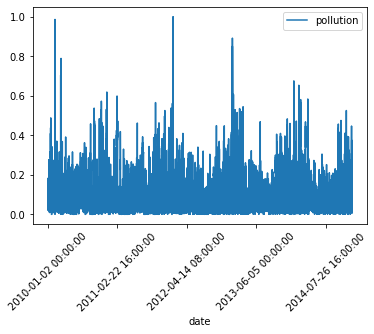

In [ ]:
univariate_dataframe = pd.DataFrame(scaled_dataframe['pollution'])
univariate_dataframe.plot(subplots=True, rot=45)
display(univariate_dataframe)

The below function formats the dataset in a way that our deep learning models, which we will use later on in our report, can understand and process it. We will start by dividing our sequence dataset into samples that consist of inputs and outputs. The split-sequence function below converts a time series forecasting problem to a supervised learning problem by splitting the given univariate sequence into multiple samples by passing the number of time steps that represent the window or step size. In other words, the number of steps specifies how much data we want to look back on for one-step prediction that is being learned from our samples.

The function returns input features and output predictions of the samples.

In [ ]:
# univariate, single step (y1)
# X:[[[1], [2], [3], [4], [5]]] y:[6]
# X:[[[2], [3], [4], [5], [6]]] y:[7]
# X:[[[3], [4], [5], [6], [7]]] y:[8]
def uni_split_sequence(sequence,n_steps):
    X,y = list(),list()
    df_as_np = sequence.to_numpy()
    for i in range(len(df_as_np)):
        # find the end of this pattern
        end_idx = i+n_steps
        # Check if we are beyond the sequence 
        if end_idx  > len(df_as_np)-1:
            break
        # gather i/o parts of the pattern
        seq_x = df_as_np[i:end_idx]
        seq_y = df_as_np[end_idx]
        X.append(seq_x)
        y.append(seq_y)        
    return np.array(X), np.array(y).flatten()

np.random.seed(12345)
univariate_dataframe = pd.DataFrame(univariate_dataframe)
x_train_uni, y_train_uni = uni_split_sequence(univariate_dataframe, 5)
(x_train_uni.shape, y_train_uni.shape)

((43795, 5, 1), (43795,))

The above output is in the following formats: (batch_size, timestep, input_features) so 43795 represents the number of samples we have in our dataset, 5 represents the size of the window to look back at it so in our case will be the values of air pollution for the past consecutive 5 hours thus each hour is considered as a single column and 1 is the number of features as we will be predicting a single value (*air pollution level*). 

#### 3.5 Holdout Validation



Our goal is to prepare our dataset in a format that helps to improve our deep learning model's performance, or to be more specific, reduce the loss score of our neural network. We will start by splitting the above results into three sets: training set, validation set and testing set. The holdout validation technique is the best way to consider when you have a large dataset so you can split it into three sets so the training set represents 80% of the whole dataset where the validation set represents 10% of the whole dataset and the testing set represents the 10% that left. 



In [ ]:
X_train1, y_train1 = x_train_uni[:35000], y_train_uni[:35000]
X_val1, y_val1 = x_train_uni[35000:39400], y_train_uni[35000:39400]
X_test1, y_test1 = x_train_uni[39400:], y_train_uni[39400:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((35000, 5, 1), (35000,), (4400, 5, 1), (4400,), (4395, 5, 1), (4395,))

The output of the training set can be interpreted as follows: we have 35k samples in the training set, each sample consists of 5 columns and these columns represent the timesteps so we have the air pollution level for the previous 5 consecutive hours to predict the air pollution in the ${6^{th}}$ hour. In other words, for the previous 5 consecutive hours, we collect only a single measurement (air pollution) at each timestep to predict the air pollution in the ${6^{th}}$ hour.


The same was applied to the validation and testing sets but with a different number of samples. The big portion goes for the training set since we want to train our neural network on a large number of data.
You can see below that, we predicted the air pollution values for the first 5 timesteps, then consider that output as one of the 5 values in the next set. For example, we predict [0.10965795] first, then we take that [0.10965795] as input in the second set and so on.

In [ ]:
print ('Single window of past history that consists of the past 5 hours')
print (X_train1[0])
print ('\n Target air pollution to predict')
print (y_train1[0])

Single window of past history that consists of the past 5 hours
[[0.12977867]
 [0.14889336]
 [0.15995976]
 [0.18209256]
 [0.138833  ]]

 Target air pollution to predict
0.10965794768611671


After generating the data, let's examine a solitary instance. The information given to the network is given in blue which represents the history that consists of 5 hours for the first sample as an example, and it must predict the value at the red cross which is the ${6^{th}}$ hour in the following window.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

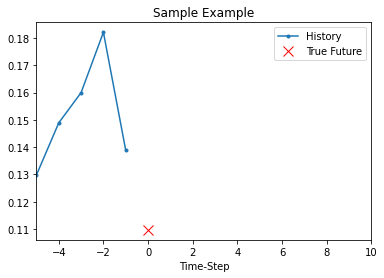

In [ ]:
def show_plot(plot_data, delta, title, time_steps):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = time_steps
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

show_plot([X_train1[0], y_train1[0]], 0, 'Sample Example', list(range(-[X_train1[0], y_train1[0]][0].shape[0], 0)))

### 4. Build Non-Machine-Learning Baseline Model

Instead of immediately resorting to complex deep-learning models to address the air pollution prediction problem, it is recommended to start with a simple approach that uses straightforward and basic logic. This approach can help verify the sanity of more advanced machine-learning models and establish a reference point to measure their effectiveness. In situations where there is no known solution to a problem, employing a common-sense baseline can be particularly beneficial.

In this scenario, it is reasonable to consider the air pollution time series as continuous. The fundamental approach, when presented with an input data point, analyzes the entire history and anticipates the subsequent point to be the absolute mean of the most recent five observations.

In [ ]:
def baseline(history):
  # np.mean(np.abs(preds - targets))
  return np.mean(np.abs(history))

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

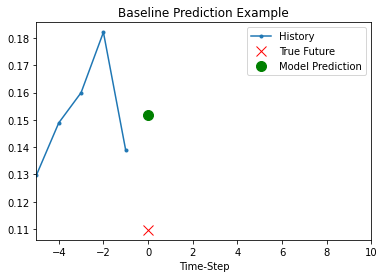

In [ ]:
show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0, 'Baseline Prediction Example', list(range(-[X_train1[0], y_train1[0]][0].shape[0], 0)))

Let's see if we can beat this baseline model using a *Fully Connected Layer or Dense Layer*.

### 5. A basic machine-learning approach

Let's develop a model that does better than a baseline. As it is helpful to establish a common-sense baseline before attempting machine-learning methods, it is advantageous to begin with simple and cost-effective machine-learning models, like small, densely connected networks, before moving on to more complex and computationally intensive models such as RNNs or LSTM. This guarantees that any additional complexity added to the problem is justifiable and produces actual benefits. The provided code showcases a fully connected model that starts by flattening the data and then applies two Dense layers, with the final Dense layer having no activation function, which is typical for a regression problem. The loss function used is binary_crossentropy.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 5)                 0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 32)                192       
                                                                 
 Output_Layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________
None


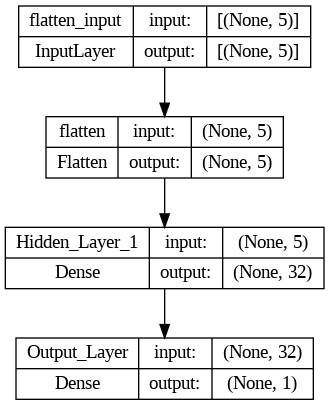

In [ ]:
tf.random.set_seed(13)
model = Sequential()
model.add(layers.Flatten(input_shape=(5,)))
model.add(layers.Dense(units=32,  activation='relu',name='Hidden_Layer_1'))
model.add(layers.Dense(units=1, name='Output_Layer'))
print(model.summary())
plot_model(model, show_shapes=True)

 As we can see above, the number of trainable parameters is relatively small which makes the network's complexity somehow low. 

#### The Keras callback during model training

 When training a model, it's difficult to predict how many epochs will be necessary to achieve the best validation loss. The well known strategy is to train for enough epochs to begin overfitting, then determine the ideal number of epochs and train again from scratch. However, this approach is inefficient. A better option is to stop training once the validation loss stops improving. This can be accomplished using a Keras callback, which is an object passed to the model during training that can be called at various stages of training. The callback has access to information about the model's state and performance and can interrupt training, save the model, load a different weight set, or make other changes to the model's state. There are many examples of how to use the Keras callback and we have chosen the *Model checkpointing* which stores the current weights of the model at various stages of training. 

Let's train our basic machine learning model.

In [ ]:
# modelcheckpoint saves based on the lowest val_loss in the model1 file
# so if val_loss of epoch 2 was lower than epoch 1, 
# the modelcheckpoint will save the val_loss of epoch 2
# np.random.seed(12345)
cp = ModelCheckpoint('model1/', save_best_only=True)
model.compile(optimizer=RMSprop(), loss='binary_crossentropy',  metrics=[RootMeanSquaredError()])
model_history = model.fit(X_train1, y_train1,epochs=10,validation_data=(X_val1,y_val1), callbacks=[cp])

Epoch 1/10
1094/1094 [==============================] - 6s 4ms/step - loss: 0.2727 - root_mean_squared_error: 0.0286 - val_loss: 0.2927 - val_root_mean_squared_error: 0.0278
Epoch 2/10
1094/1094 [==============================] - 6s 5ms/step - loss: 0.2720 - root_mean_squared_error: 0.0280 - val_loss: 0.2924 - val_root_mean_squared_error: 0.0275
Epoch 3/10
1094/1094 [==============================] - 8s 7ms/step - loss: 0.2714 - root_mean_squared_error: 0.0280 - val_loss: 0.2922 - val_root_mean_squared_error: 0.0264
Epoch 4/10
1094/1094 [==============================] - 4s 4ms/step - loss: 0.2712 - root_mean_squared_error: 0.0280 - val_loss: 0.2926 - val_root_mean_squared_error: 0.0269
Epoch 5/10
1094/1094 [==============================] - 5s 5ms/step - loss: 0.2712 - root_mean_squared_error: 0.0279 - val_loss: 0.2926 - val_root_mean_squared_error: 0.0268
Epoch 6/10
1094/1094 [==============================] - 2s 2ms/step - loss: 0.2711 - root_mean_squared_error: 0.0280 - val_loss: 0

Let's plot the results by displaying the loss curves for validation and training.

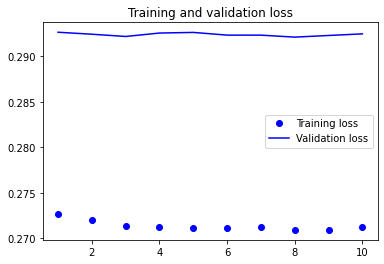

Mean of Training Loss 0.2714035451412201
Mean of Validation Loss 0.29240278601646424


In [ ]:
model = load_model('model1/')
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
print('Mean of Training Loss', np.mean(loss))
print('Mean of Validation Loss', np.mean(val_loss))

The above graph represents the loss values of the training and validation which are relatively small since the values are closer to zero.

Although the initial fully connected method didn't perform that well, due to the difference between the training and validation loss but maybe other machine learning models would be more suitable for this task. The problem with this approach was that it flattened the time series, resulting in the loss of the sequence's time-based nature. Instead, we need to view the data as a sequence in which causality and order are significant. Therefore, we'll test a recurrent-sequence processing model, which should be a better match for this type of sequence data since it takes advantage of the temporal ordering of data points, something the initial method did not.

### 6. A first recurrent baseline Model (LSTM)

There are different varieties of RNNs, including LSTM networks (long short-term memory), that have been developed to address the issue of "vanishing gradients" or "long-term dependence" in RNNs, where the network has difficulty learning due to the small gradients of the weights in the network. LSTM networks employ a specialized type of memory cell that can store and retrieve information. These memory cells use a set of gates that regulate the information flow in and out of the cell, allowing the network to store or forget information based on the inputs and the previous state of the cell. The gates in LSTM networks are controlled by sigmoid activation functions, which produce values between 0 and 1. These memory cells can remember information for extended periods of time.
As a result, LSTM assists RNN in remembering the critical inputs needed to generate the correct output. LSTMs are often used for tasks involving long-term dependencies such as time series forecasting. 

The key in the definition is the input shape, which indicates the number of time steps and features that the model requires as input for each sample. The first hidden layer's input_shape argument specifies the input shape for the model which is in the following format: (timesteps, input_features). We are working with a univariate single step time series forecasting, so the window size is five, for one variable.


Let's define our neural network model (LSTM: Long Short Term Memory) by adding 32 LSTM unit (or neuron) in our first layer, then a dense layer with 8 neurons with a ReLU activation function followed by a dense layer with one node for the output.


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (LSTM)       (None, 32)                4352      
                                                                 
 Hidden_Layer_2 (Dense)      (None, 8)                 264       
                                                                 
 Output_Layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 4,625
Trainable params: 4,625
Non-trainable params: 0
_________________________________________________________________
None


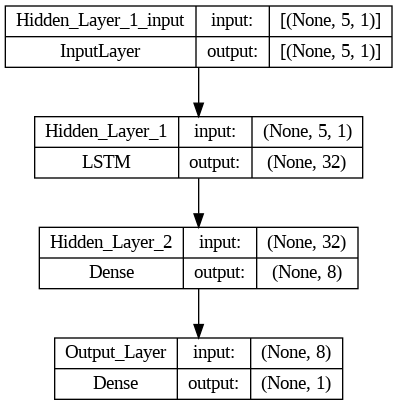

In [ ]:
tf.random.set_seed(13)
basic_lstm_model = Sequential()
basic_lstm_model.add(layers.LSTM(units=32, input_shape=(5,1), name='Hidden_Layer_1'))
basic_lstm_model.add(layers.Dense(8, activation='relu', name='Hidden_Layer_2'))
basic_lstm_model.add(layers.Dense(1, activation='linear', name='Output_Layer'))
print(basic_lstm_model.summary())
plot_model(basic_lstm_model, show_shapes=True)

As demonstrated above, the number of trainable parameters is 4,625, which is a relatively high value. The considerable amount of trainable parameters implies that the network requires more time to learn, resulting in an increase in its time complexity. Thus this model is much slower than the basic one so maybe we can tune its parameters later on in the report in order to let it run faster and easier to be trained or maybe we can go for another type of neural networks. 

In [ ]:
# modelcheckpoint saves based on the lowest val_loss in the model1 file
# so if val_loss of epoch 2 was lower than epoch 1, 
# the modelcheckpoint will save the val_loss of epoch 2
# np.random.seed(12345)
tf.random.set_seed(13)
cp1 = ModelCheckpoint('basic_lstm_model/', save_best_only=True)
basic_lstm_model.compile(optimizer=RMSprop(), loss=MeanAbsoluteError(),  metrics=[RootMeanSquaredError()])
basic_lstm_history = basic_lstm_model.fit(X_train1, y_train1,epochs=10,validation_data=(X_val1,y_val1), callbacks=[cp1])

Epoch 1/10
1086/1094 [============================>.] - ETA: 0s - loss: 0.0133 - root_mean_squared_error: 0.0272

1094/1094 [==============================] - 15s 12ms/step - loss: 0.0133 - root_mean_squared_error: 0.0272 - val_loss: 0.0138 - val_root_mean_squared_error: 0.0263
Epoch 2/10
1090/1094 [============================>.] - ETA: 0s - loss: 0.0133 - root_mean_squared_error: 0.0273

1094/1094 [==============================] - 11s 10ms/step - loss: 0.0133 - root_mean_squared_error: 0.0273 - val_loss: 0.0131 - val_root_mean_squared_error: 0.0259
Epoch 3/10
1094/1094 [==============================] - 7s 6ms/step - loss: 0.0133 - root_mean_squared_error: 0.0271 - val_loss: 0.0135 - val_root_mean_squared_error: 0.0261
Epoch 4/10
1094/1094 [==============================] - 6s 6ms/step - loss: 0.0133 - root_mean_squared_error: 0.0272 - val_loss: 0.0136 - val_root_mean_squared_error: 0.0261
Epoch 5/10
1092/1094 [============================>.] - ETA: 0s - loss: 0.0133 - root_mean_squared_error: 0.0272

1094/1094 [==============================] - 11s 10ms/step - loss: 0.0133 - root_mean_squared_error: 0.0272 - val_loss: 0.0129 - val_root_mean_squared_error: 0.0259
Epoch 6/10
1094/1094 [==============================] - 6s 6ms/step - loss: 0.0133 - root_mean_squared_error: 0.0272 - val_loss: 0.0132 - val_root_mean_squared_error: 0.0260
Epoch 7/10
1094/1094 [==============================] - 5s 5ms/step - loss: 0.0133 - root_mean_squared_error: 0.0272 - val_loss: 0.0136 - val_root_mean_squared_error: 0.0262
Epoch 8/10
1090/1094 [============================>.] - ETA: 0s - loss: 0.0133 - root_mean_squared_error: 0.0272

1094/1094 [==============================] - 11s 10ms/step - loss: 0.0133 - root_mean_squared_error: 0.0271 - val_loss: 0.0129 - val_root_mean_squared_error: 0.0258
Epoch 9/10
1094/1094 [==============================] - 5s 5ms/step - loss: 0.0133 - root_mean_squared_error: 0.0271 - val_loss: 0.0130 - val_root_mean_squared_error: 0.0258
Epoch 10/10
1094/1094 [==============================] - 6s 6ms/step - loss: 0.0133 - root_mean_squared_error: 0.0270 - val_loss: 0.0130 - val_root_mean_squared_error: 0.0257


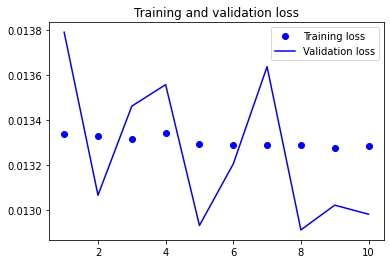

Mean of Training Loss 0.01330620227381587
Mean of Validation Loss 0.013257074728608131


In [ ]:
basic_lstm_model = load_model('basic_lstm_model/')
loss = basic_lstm_history.history['loss']
val_loss = basic_lstm_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
print('Mean of Training Loss', np.mean(loss))
print('Mean of Validation Loss', np.mean(val_loss))

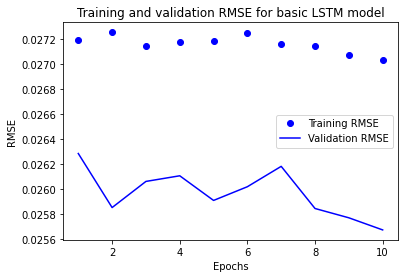

In [ ]:
plt.clf()
root_mean_squared_error_values = basic_lstm_history.history['root_mean_squared_error']
val_root_mean_squared_error_values = basic_lstm_history.history['val_root_mean_squared_error']
plt.plot(epochs, root_mean_squared_error_values, 'bo', label='Training RMSE')
plt.plot(epochs, val_root_mean_squared_error_values, 'b', label='Validation RMSE')
plt.title('Training and validation RMSE for basic LSTM model')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

We have achieved a notable victory over the common sense baseline, which highlights the effectiveness of machine learning. Moreover, this success showcases the superiority of recurrent networks over sequence-flattening dense networks for this particular task.

At first, we have simulated the LSTM model using 'binary_crossentropy' as loss function but the results were almost the same as the basic machine learning (fully connected) model. Since the task at hand is regression, therefore we can use 'Mean Absolute Error' or 'Mean Squared Error' because they provide a quantitative measure of the model's performance by comparing the predicted values to the actual values and above we have used MAE as an arbitrary choice. 

The metric we have used in the task at hand is the RMSE. The RMSE is a way to measure how much the predicted values differ from the actual values in a regression analysis. Typically, the RMSE can range from 0 to infinity, where a lower RMSE value indicates that the model predictions are more accurate, while a higher RMSE value indicates that the model predictions are less accurate.


As demonstrated above, the training and validation loss became closer compared to the basic flattened machine learning model but as we can see there are very obvious spikes so probably we still have a bit of a margin for improvement. In addition, we can clearly see that the basic flattened machine learning model 
has a worse average rate of loss values for both the training and validation sets (0.271, 0.292) than the basic LSTM model, (0.0133, 0.0132). This implies that our LSTM model has captured the dataset much better than the dense connected model due to the LSTM model having the history and taking into account the time series nature of our data.


 Moreover, the range of values for training RMSE and validation RMSE for both models is almost the same so the comapraison in terms of the RMSE will not be beneficial.



The below function shows the predictions versus the actuals in a dataframe format and through a graph as well by taking as input the model saved in the memory , the input features and the output values for a specific range of the data to be plotted. 

In [ ]:
def plot_predictions(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  dataframe = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y.flatten()})
  plt.plot(dataframe['Predictions'][start:end],'red', label='train')
  plt.plot(dataframe['Actuals'][start:end],'blue', label='test')
  plt.xlabel("Timesteps in hours")   # we are using the previous 5 hrs to predict the next hour (window information)
  plt.ylabel("Air Pollution")
  plt.title("Predictions vs Actuals")
  plt.legend()
  return display(dataframe), mae(y, predictions)

basic_lstm_model = load_model('basic_lstm_model/')

1094/1094 [==============================] - 4s 3ms/step


,Predictions,Actuals
0,0.129713,0.109658
1,0.101947,0.105634
2,0.104705,0.124748
3,0.131502,0.120724
4,0.123760,0.132797
...,...,...
34995,0.002969,0.000000
34996,0.002969,0.000000
34997,0.002969,0.000000
34998,0.002969,0.034205


(None, 0.01328844224397772)

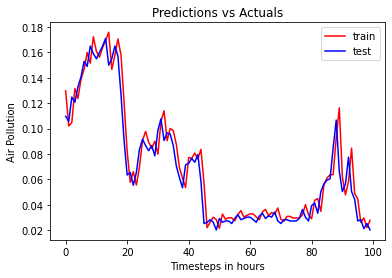

In [ ]:
basic_lstm_model = load_model('basic_lstm_model/')
plot_predictions(basic_lstm_model, X_train1, y_train1)

The above graph shows that the predictions are close to the actuals however this is the training data so we don't really care about how well it did since it's already seen data before. Thus we will apply the above function on our validation set.

138/138 [==============================] - 1s 2ms/step


,Predictions,Actuals
0,0.027624,0.027163
1,0.030129,0.025151
2,0.027631,0.025151
3,0.027557,0.025151
4,0.027724,0.025151
...,...,...
4395,0.125438,0.122736
4396,0.125475,0.121730
4397,0.123933,0.141851
4398,0.150147,0.163984


(None, 0.01291184121107245)

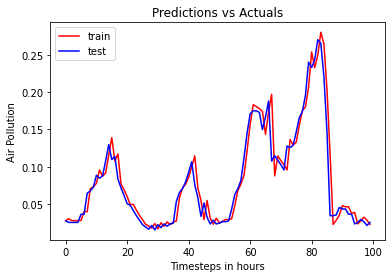

In [ ]:
plot_predictions(basic_lstm_model, X_val1, y_val1)

We can see that the validation predictions versus actuals are close as well. So let's try now the test data since it has never been seen before by our model. 

138/138 [==============================] - 0s 2ms/step


,Predictions,Actuals
0,0.174480,0.149899
1,0.145940,0.066398
2,0.051513,0.048290
3,0.039762,0.027163
4,0.023211,0.030181
...,...,...
4390,0.011887,0.008048
4391,0.009769,0.010060
4392,0.011850,0.010060
4393,0.011910,0.008048


(None, 0.011084264715650813)

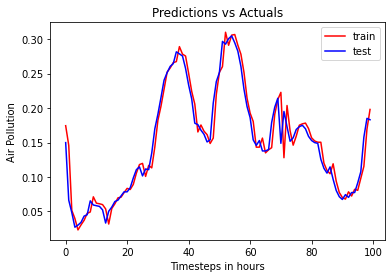

In [ ]:
plot_predictions(basic_lstm_model, X_test1, y_test1)

At a certain point in the curve presented above, the predictions results deviate a little bit from the actuals but still good to be considered.

### 7. Scaling up: developing a model that overfits

Because we are no longer overfitting but seem to have hit a performance bottleneck so let's increase the capacity of our network in terms of number of neurons and layers. In this section we will try to overfit our model and see its behaviour. 

We will start first by increasing the number of units in the first and second hidden layers while keeping the same number of epochs. 

#### 7.1 Increase Number of Units to Overfit: 

In [ ]:
print(np.mean(loss))
print(np.mean(val_loss)) 

0.27132777869701385
0.2925401031970978


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (LSTM)       (None, 512)               1052672   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 Output_Layer (Dense)        (None, 1)                 257       
                                                                 
Total params: 1,184,257
Trainable params: 1,184,257
Non-trainable params: 0
_________________________________________________________________
None


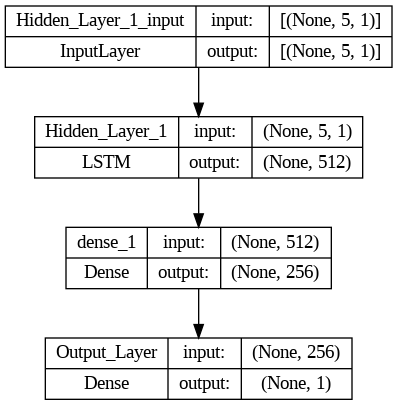

In [ ]:
overfit_lstm_model = Sequential()
overfit_lstm_model.add(layers.LSTM(units=512, input_shape=(5,1), name='Hidden_Layer_1'))
overfit_lstm_model.add(layers.Dense(256, activation='relu'))
overfit_lstm_model.add(layers.Dense(1, activation='linear', name='Output_Layer'))
print(overfit_lstm_model.summary())
plot_model(overfit_lstm_model, show_shapes=True)

As we can see above, the time complexity of this model is considered very large and this is due to the huge number of trainable parameters (1,184,257) which leads to high time execution to train our model.


In [ ]:
np.random.seed(12345)   
tf.random.set_seed(13)
cp1 = ModelCheckpoint('overfit_lstm_model/', save_best_only=True)
overfit_lstm_model.compile(optimizer=RMSprop(), loss=MeanAbsoluteError(),  metrics=[RootMeanSquaredError()])
overfit_lstm_history = overfit_lstm_model.fit(X_train1, y_train1, epochs=10, batch_size=100, validation_data=(X_val1,y_val1), callbacks=[cp1])

Epoch 1/10
350/350 [==============================] - ETA: 0s - loss: 0.0224 - root_mean_squared_error: 0.0373

350/350 [==============================] - 59s 161ms/step - loss: 0.0224 - root_mean_squared_error: 0.0373 - val_loss: 0.0211 - val_root_mean_squared_error: 0.0321
Epoch 2/10
350/350 [==============================] - ETA: 0s - loss: 0.0172 - root_mean_squared_error: 0.0307

350/350 [==============================] - 57s 162ms/step - loss: 0.0172 - root_mean_squared_error: 0.0307 - val_loss: 0.0140 - val_root_mean_squared_error: 0.0266
Epoch 3/10
350/350 [==============================] - 52s 148ms/step - loss: 0.0162 - root_mean_squared_error: 0.0296 - val_loss: 0.0169 - val_root_mean_squared_error: 0.0282
Epoch 4/10
350/350 [==============================] - 50s 143ms/step - loss: 0.0156 - root_mean_squared_error: 0.0289 - val_loss: 0.0151 - val_root_mean_squared_error: 0.0267
Epoch 5/10
350/350 [==============================] - 50s 142ms/step - loss: 0.0151 - root_mean_squared_error: 0.0285 - val_loss: 0.0149 - val_root_mean_squared_error: 0.0266
Epoch 6/10
350/350 [==============================] - 51s 146ms/step - loss: 0.0149 - root_mean_squared_error: 0.0285 - val_loss: 0.0159 - val_root_mean_squared_error: 0.0280
Epoch 7/10
350/350 [==============================] - ETA: 0s - loss: 0.0146 - root_mean_squared_error: 0.0282

350/350 [==============================] - 54s 155ms/step - loss: 0.0146 - root_mean_squared_error: 0.0282 - val_loss: 0.0132 - val_root_mean_squared_error: 0.0258
Epoch 8/10
350/350 [==============================] - 51s 146ms/step - loss: 0.0144 - root_mean_squared_error: 0.0281 - val_loss: 0.0144 - val_root_mean_squared_error: 0.0264
Epoch 9/10
350/350 [==============================] - 49s 140ms/step - loss: 0.0144 - root_mean_squared_error: 0.0281 - val_loss: 0.0137 - val_root_mean_squared_error: 0.0260
Epoch 10/10
350/350 [==============================] - 51s 145ms/step - loss: 0.0142 - root_mean_squared_error: 0.0279 - val_loss: 0.0134 - val_root_mean_squared_error: 0.0260


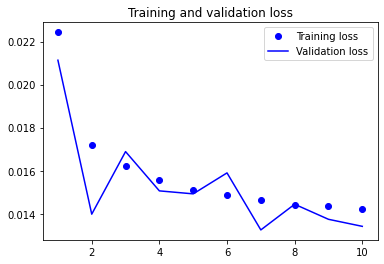

Mean of Training Loss 0.015904389414936305
Mean of Validation Loss 0.015271853096783162


In [ ]:
overfit_lstm_model = load_model('overfit_lstm_model/')
loss = overfit_lstm_history.history['loss']
val_loss = overfit_lstm_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
print('Mean of Training Loss', np.mean(loss))
print('Mean of Validation Loss', np.mean(val_loss))

<!-- The training loss is decreasing continuously, meanwhile, the number of spikes in the validation loss has increased and most of the time higher than the training loss values.  -->

<!-- # a-mention el far2 dah plus kaman el time taken due to very high number of trainable parameters -->


As we can see the above results, the average rate for both the training and validation loss values became worse (0.0159, 0.0152) than the basic LSTM model loss values (0.0133, 0.0132) while trying to overfit our model.

After increasing the number of neurons from 32 to 512 in the first hidden layer and from 8 to 256 neurons in the second hidden layer, we can notice that the loss values of the training set decrease with every epoch, which means that our network still need to be trained. On the other side, the loss values of the validation set are fluctuating, not decreasing in a consistent way.

Moreover, the range of RMSE training values for our overfit_lstm_model has become wider, spanning from 0.0279 to 0.0373, while the RMSE training range for our basic_lstm_model is narrower, between 0.0270 and 0.0273. Same goes for the validation set but with different values, the RMSE validation range interval of our overfit_lstm_model is [0.0258,0.0321] whereas the RMSE validation range interval of our basic_lstm_model is [0.0257,0.0263].  

Therefore, we can conclude that the difference between predicted values and actual values has increased which leads to less accurate results.



138/138 [==============================] - 2s 11ms/step


,Predictions,Actuals
0,0.026421,0.027163
1,0.028881,0.025151
2,0.026788,0.025151
3,0.027053,0.025151
4,0.026981,0.025151
...,...,...
4395,0.125775,0.122736
4396,0.126582,0.121730
4397,0.125151,0.141851
4398,0.148243,0.163984


(None, 0.01310338179397354)

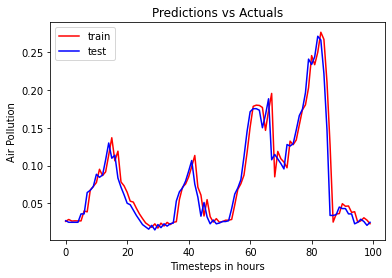

In [ ]:
plot_predictions(overfit_lstm_model, X_val1, y_val1)

138/138 [==============================] - 1s 10ms/step


,Predictions,Actuals
0,0.174066,0.149899
1,0.147709,0.066398
2,0.051201,0.048290
3,0.049910,0.027163
4,0.028764,0.030181
...,...,...
4390,0.012541,0.008048
4391,0.010714,0.010060
4392,0.012545,0.010060
4393,0.012558,0.008048


(None, 0.011346465489611966)

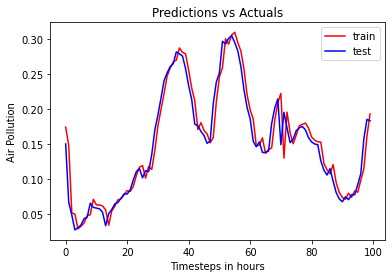

In [ ]:
plot_predictions(overfit_lstm_model, X_test1, y_test1)

Let's move to another technique since we aren’t overfitting too badly, so we are likely under capacity, this technique called *Stacking Recurrent Layers*.

#### 7.2 Stacking Recurrent (LSTM) Layers to Overfit:

To increase the network capacity, it's commonly practiced to augment the number of units in each layer or add additional layers. A traditional approach to develop more robust recurrent networks is by stacking recurrent layers. 
A Recurrent Neural Network model that consists of several Recurrent Neural Network layers is known as a stacked recurrent layer. These layers generate a sequence as output instead of a single value output to the recurrent neural network layer.
An example of this is the Google Translate algorithm, which employs a stack of seven extensive LSTM layers, signifying its enormous capacity. When stacking recurrent layers on top of each other using Keras, it's crucial that intermediate layers return their complete sequence of outputs, i.e., a 3D tensor, rather than just the output at the last time step. This requirement can be satisfied by specifying "return_sequences=True". In addition, we added a hidden layer with 64 units to the layers of the previous model.

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (LSTM)       (None, 5, 512)            1052672   
                                                                 
 lstm_1 (LSTM)               (None, 256)               787456    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 Output_Layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 1,856,641
Trainable params: 1,856,641
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1094/1094 [==============================] - ETA: 0s - loss: 0.0203 - root_mean_squared_error: 0.0347

1094/1094 [==============================] - 167s 150ms/step - loss: 0.0203 - root_mean_squared_error: 0.0347 - val_loss: 0.0154 - val_root_mean_squared_error: 0.0276
Epoch 2/10
1094/1094 [==============================] - 150s 137ms/step - loss: 0.0158 - root_mean_squared_error: 0.0295 - val_loss: 0.0158 - val_root_mean_squared_error: 0.0274
Epoch 3/10
1094/1094 [==============================] - 149s 136ms/step - loss: 0.0150 - root_mean_squared_error: 0.0287 - val_loss: 0.0171 - val_root_mean_squared_error: 0.0286
Epoch 4/10
1094/1094 [==============================] - 149s 136ms/step - loss: 0.0147 - root_mean_squared_error: 0.0284 - val_loss: 0.0162 - val_root_mean_squared_error: 0.0280
Epoch 5/10
1094/1094 [==============================] - ETA: 0s - loss: 0.0145 - root_mean_squared_error: 0.0282

1094/1094 [==============================] - 161s 147ms/step - loss: 0.0145 - root_mean_squared_error: 0.0282 - val_loss: 0.0140 - val_root_mean_squared_error: 0.0269
Epoch 6/10
1094/1094 [==============================] - ETA: 0s - loss: 0.0143 - root_mean_squared_error: 0.0282

1094/1094 [==============================] - 166s 152ms/step - loss: 0.0143 - root_mean_squared_error: 0.0282 - val_loss: 0.0138 - val_root_mean_squared_error: 0.0264
Epoch 7/10
1094/1094 [==============================] - ETA: 0s - loss: 0.0142 - root_mean_squared_error: 0.0282

1094/1094 [==============================] - 153s 140ms/step - loss: 0.0142 - root_mean_squared_error: 0.0282 - val_loss: 0.0135 - val_root_mean_squared_error: 0.0260
Epoch 8/10
1094/1094 [==============================] - 141s 129ms/step - loss: 0.0141 - root_mean_squared_error: 0.0279 - val_loss: 0.0153 - val_root_mean_squared_error: 0.0279
Epoch 9/10
1094/1094 [==============================] - 144s 132ms/step - loss: 0.0140 - root_mean_squared_error: 0.0279 - val_loss: 0.0140 - val_root_mean_squared_error: 0.0263
Epoch 10/10
1094/1094 [==============================] - 162s 148ms/step - loss: 0.0140 - root_mean_squared_error: 0.0279 - val_loss: 0.0137 - val_root_mean_squared_error: 0.0262


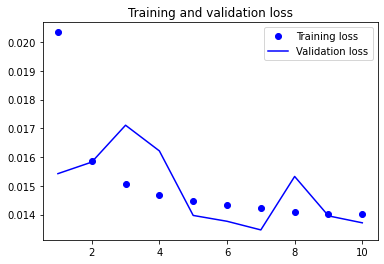

Mean of Training Loss 0.015106449741870165
Mean of Validation Loss 0.014878395479172468


In [ ]:
stacked_lstm_model = Sequential()
stacked_lstm_model.add(layers.LSTM(units=512, input_shape=(5,1),return_sequences=True, name='Hidden_Layer_1'))
stacked_lstm_model.add(layers.LSTM(256, activation='relu'))
stacked_lstm_model.add(layers.Dense(64, activation='relu'))
stacked_lstm_model.add(layers.Dense(1, activation='linear', name='Output_Layer'))
print(stacked_lstm_model.summary())
plot_model(stacked_lstm_model, show_shapes=True)
np.random.seed(12345)  
cp1 = ModelCheckpoint('stacked_lstm_model/', save_best_only=True)
stacked_lstm_model.compile(optimizer=RMSprop(), loss=MeanAbsoluteError(),  metrics=[RootMeanSquaredError()])
stacked_lstm_history = stacked_lstm_model.fit(X_train1, y_train1,epochs=10,validation_data=(X_val1,y_val1),
                    callbacks=[cp1])
stacked_lstm_model = load_model('stacked_lstm_model/')
loss = stacked_lstm_history.history['loss']
val_loss = stacked_lstm_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
print('Mean of Training Loss', np.mean(loss))
print('Mean of Validation Loss', np.mean(val_loss))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (LSTM)       (None, 5, 512)            1052672   
                                                                 
 lstm (LSTM)                 (None, 256)               787456    
                                                                 
 dense_3 (Dense)             (None, 64)                16448     
                                                                 
 Output_Layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 1,856,641
Trainable params: 1,856,641
Non-trainable params: 0
_________________________________________________________________
None


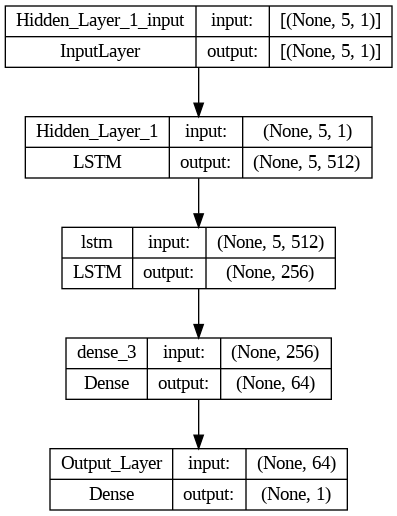

In [ ]:
stacked_lstm_model = Sequential()
stacked_lstm_model.add(layers.LSTM(units=512, input_shape=(5,1),return_sequences=True, name='Hidden_Layer_1'))
stacked_lstm_model.add(layers.LSTM(256, activation='relu'))
stacked_lstm_model.add(layers.Dense(64, activation='relu'))
stacked_lstm_model.add(layers.Dense(1, activation='linear', name='Output_Layer'))
print(stacked_lstm_model.summary())
plot_model(stacked_lstm_model, show_shapes=True)

As we demonstrated above, the number of trainable paramters is now extremely big which increases much more the time complexity of our neural network compared to our overfitted model in section 7.1 (previous section). In section 7.1, where we started overfitting our model by increasing the number of units in each layer, the number of trainable paramters was 1,184,257 whereas here the number is 1,856,641 and this is an increase by almost 64% which leads to much slower model to be trained.

In [ ]:
np.random.seed(12345)   
cp1 = ModelCheckpoint('stacked_lstm_model/', save_best_only=True)
stacked_lstm_model.compile(optimizer=RMSprop(), loss=MeanAbsoluteError(),  metrics=[RootMeanSquaredError()])
stacked_lstm_history = stacked_lstm_model.fit(X_train1, y_train1,epochs=10,validation_data=(X_val1,y_val1),
                    callbacks=[cp1])

Epoch 1/10
1094/1094 [==============================] - ETA: 0s - loss: 0.0203 - root_mean_squared_error: 0.0347

1094/1094 [==============================] - 178s 155ms/step - loss: 0.0203 - root_mean_squared_error: 0.0347 - val_loss: 0.0209 - val_root_mean_squared_error: 0.0317
Epoch 2/10
1094/1094 [==============================] - ETA: 0s - loss: 0.0159 - root_mean_squared_error: 0.0296

1094/1094 [==============================] - 166s 152ms/step - loss: 0.0159 - root_mean_squared_error: 0.0296 - val_loss: 0.0189 - val_root_mean_squared_error: 0.0292
Epoch 3/10
1094/1094 [==============================] - ETA: 0s - loss: 0.0151 - root_mean_squared_error: 0.0287

1094/1094 [==============================] - 180s 165ms/step - loss: 0.0151 - root_mean_squared_error: 0.0287 - val_loss: 0.0158 - val_root_mean_squared_error: 0.0283
Epoch 4/10
1094/1094 [==============================] - ETA: 0s - loss: 0.0147 - root_mean_squared_error: 0.0285

1094/1094 [==============================] - 170s 155ms/step - loss: 0.0147 - root_mean_squared_error: 0.0285 - val_loss: 0.0153 - val_root_mean_squared_error: 0.0277
Epoch 5/10
1094/1094 [==============================] - ETA: 0s - loss: 0.0145 - root_mean_squared_error: 0.0284

1094/1094 [==============================] - 192s 176ms/step - loss: 0.0145 - root_mean_squared_error: 0.0284 - val_loss: 0.0148 - val_root_mean_squared_error: 0.0270
Epoch 6/10
1094/1094 [==============================] - 170s 156ms/step - loss: 0.0144 - root_mean_squared_error: 0.0283 - val_loss: 0.0164 - val_root_mean_squared_error: 0.0295
Epoch 7/10
1094/1094 [==============================] - ETA: 0s - loss: 0.0143 - root_mean_squared_error: 0.0282

1094/1094 [==============================] - 172s 157ms/step - loss: 0.0143 - root_mean_squared_error: 0.0282 - val_loss: 0.0133 - val_root_mean_squared_error: 0.0260
Epoch 8/10
1094/1094 [==============================] - 156s 143ms/step - loss: 0.0141 - root_mean_squared_error: 0.0279 - val_loss: 0.0170 - val_root_mean_squared_error: 0.0296
Epoch 9/10
1094/1094 [==============================] - 150s 138ms/step - loss: 0.0140 - root_mean_squared_error: 0.0279 - val_loss: 0.0144 - val_root_mean_squared_error: 0.0264
Epoch 10/10
1094/1094 [==============================] - 150s 137ms/step - loss: 0.0140 - root_mean_squared_error: 0.0278 - val_loss: 0.0137 - val_root_mean_squared_error: 0.0262


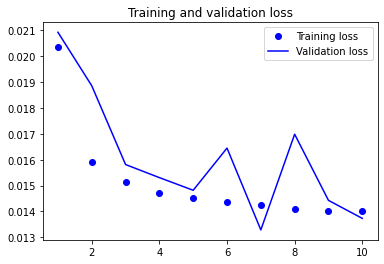

Mean of Training Loss 0.015138963982462884
Mean of Validation Loss 0.016060280706733467


In [ ]:
stacked_lstm_model = load_model('stacked_lstm_model/')
loss = stacked_lstm_history.history['loss']
val_loss = stacked_lstm_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
print('Mean of Training Loss', np.mean(loss))
print('Mean of Validation Loss', np.mean(val_loss))

<!-- mention kaman el far2 fel graph -->

It is evident that the extra layer leads to a slight improvement in the outcomes, but the difference is not substantial. We can notice from the above graph that during most of the epochs, the loss values of the validation set are higher than the loss values of the training set. Moreover, comparing to our overfit_lstm_model, the mean of the training loss values has decreased from 0.0159 to 0.0151. On the other hand, the mean of the validation loss values has increased from 0.0152 to 0.0160. These values are still considered to be low but there is a slight difference in the values which improves the training phase and worsens the validation phase. 


The training RMSE range of values for the stacked_lstm_model is from 0.0278 to 0.0347 and the validation RMSE range of values for the stacked_lstm_model is between 0.0260 and 0.0317. These values are close to the overfit_lstm_model values which means that both of them , overfit_lstm_model and stacked_lstm_model, have less accurate results comapred to the basic_lstm_model.


 Hence, two inferences can be drawn. Firstly, since the overfitting is still under control, you can consider increasing the layer size to enhance validation-loss. However, this will come at a considerable computational expense. Secondly, adding another layer did not produce a noteworthy benefit. Therefore, it is possible that augmenting the network capacity may not result in significant progress.



138/138 [==============================] - 5s 34ms/step


,Predictions,Actuals
0,0.021756,0.027163
1,0.022997,0.025151
2,0.021070,0.025151
3,0.021124,0.025151
4,0.020898,0.025151
...,...,...
4395,0.121634,0.122736
4396,0.121654,0.121730
4397,0.120939,0.141851
4398,0.141043,0.163984


(None, 0.013467789487790599)

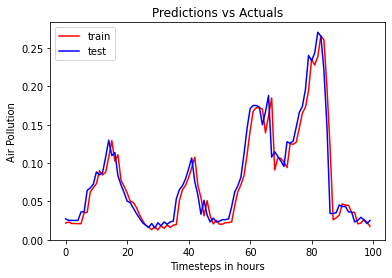

In [ ]:
plot_predictions(stacked_lstm_model, X_val1, y_val1)

138/138 [==============================] - 4s 31ms/step


,Predictions,Actuals
0,0.167605,0.149899
1,0.140290,0.066398
2,0.053327,0.048290
3,0.045619,0.027163
4,0.024184,0.030181
...,...,...
4390,0.006328,0.008048
4391,0.004891,0.010060
4392,0.006355,0.010060
4393,0.006332,0.008048


(None, 0.011781757065198996)

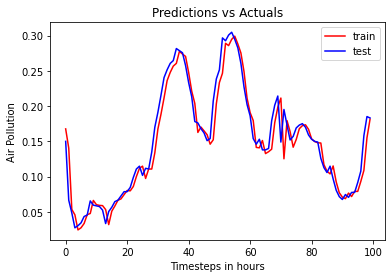

In [ ]:
plot_predictions(stacked_lstm_model, X_test1, y_test1)

 Below we are trying to mitigate overfitting using multiple techniques, such as dropout and hyperparameter tuning.
 
### 8. Model Regularization

To prevent overfitting, our neural network will undergo regularization. Below are many approaches we have applied on our neural network to fight overfitting.  

#### 8.1 Dropout on the overfitted model

Based on the training and validation curves, it is apparent that the model is overfitting. Dropout is a well-known technique used to combat overfitting by randomly setting input layer units to zero, which helps prevent the model from memorizing the training data. However, using dropout in recurrent neural networks (RNNs) is not straightforward. Previous research has shown that applying dropout before a recurrent layer impedes learning, but in 2015, Yarin Gal proposed that a consistent dropout mask should be used at each time step instead of randomly varying masks. Furthermore, to regulate the representations created by the recurrent gates of layers such as Long Short-Term Memory (LSTM), a dropout mask that is temporally constant should be applied to the inner recurrent activations (referred to as recurrent dropout). By applying the same dropout mask at each time step, the network can propagate its learning error correctly through time. Using a randomly varying dropout mask would disrupt the error signal and harm the learning process. 

So we can say that dropout is a regularization technique that randomly drops out (sets to zero) a certain percentage of the input units or neurons during each training iteration, effectively reducing the complexity of the model and preventing overfitting. Dropout is commonly used in fully connected layers and convolutional layers.

Recurrent dropout, on the other hand, is a variation of dropout that is specifically designed for recurrent neural networks (RNNs). In RNNs, the same set of weights is shared across time steps, which makes it difficult to apply dropout in the traditional sense. Recurrent dropout addresses this issue by applying dropout to the recurrent connections of the RNNs, which helps prevent overfitting and improve generalization.

In Keras, every recurrent layer has two dropout-related arguments: dropout and recurrent_dropout. The former specifies the dropout rate for input units of the layer, and the latter specifies the dropout rate of the recurrent units. To evaluate the impact of dropout and recurrent dropout on overfitting, we will add these arguments to the LSTM layer in our overfit_lstm_model that we have run above in section 7.1. 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (LSTM)       (None, 512)               1052672   
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 Output_Layer (Dense)        (None, 1)                 257       
                                                                 
Total params: 1,184,257
Trainable params: 1,184,257
Non-trainable params: 0
_________________________________________________________________
None


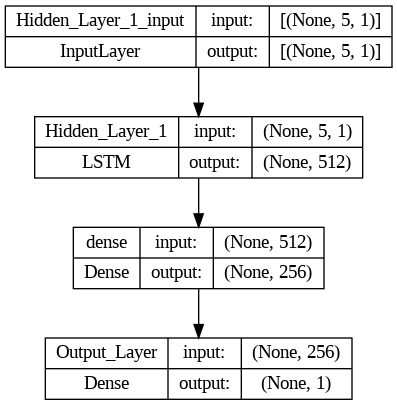

In [ ]:
regularized_overfit_lstm_model = Sequential()
# 0.2 0.2 done eshta
# 0.2 0.5 done we7sha awy 
# 0.2 0.3
# 0.1 0.2
regularized_overfit_lstm_model.add(layers.LSTM(units=512, input_shape=(5,1), dropout=0.2, recurrent_dropout=0.3, name='Hidden_Layer_1'))
regularized_overfit_lstm_model.add(layers.Dense(256, activation='relu'))
regularized_overfit_lstm_model.add(layers.Dense(1, activation='linear', name='Output_Layer'))
print(regularized_overfit_lstm_model.summary())
plot_model(regularized_overfit_lstm_model, show_shapes=True)

In [ ]:
np.random.seed(12345)    #veryy slow
cp1 = ModelCheckpoint('regularized_overfit_lstm_model/', save_best_only=True)
regularized_overfit_lstm_model.compile(optimizer=RMSprop(), loss=MeanAbsoluteError(),  metrics=[RootMeanSquaredError()])
regularized_overfit_lstm_history = regularized_overfit_lstm_model.fit(X_train1, y_train1,epochs=10,validation_data=(X_val1,y_val1),
                    callbacks=[cp1])

Epoch 1/10
1094/1094 [==============================] - ETA: 0s - loss: 0.0178 - root_mean_squared_error: 0.0343

1094/1094 [==============================] - 168s 150ms/step - loss: 0.0178 - root_mean_squared_error: 0.0343 - val_loss: 0.0251 - val_root_mean_squared_error: 0.0383
Epoch 2/10
1094/1094 [==============================] - ETA: 0s - loss: 0.0176 - root_mean_squared_error: 0.0339

1094/1094 [==============================] - 163s 149ms/step - loss: 0.0176 - root_mean_squared_error: 0.0339 - val_loss: 0.0247 - val_root_mean_squared_error: 0.0384
Epoch 3/10
1094/1094 [==============================] - 158s 145ms/step - loss: 0.0173 - root_mean_squared_error: 0.0330 - val_loss: 0.0258 - val_root_mean_squared_error: 0.0394
Epoch 4/10
1094/1094 [==============================] - 143s 131ms/step - loss: 0.0170 - root_mean_squared_error: 0.0327 - val_loss: 0.0273 - val_root_mean_squared_error: 0.0406
Epoch 5/10
1094/1094 [==============================] - ETA: 0s - loss: 0.0170 - root_mean_squared_error: 0.0323

1094/1094 [==============================] - 154s 140ms/step - loss: 0.0170 - root_mean_squared_error: 0.0323 - val_loss: 0.0216 - val_root_mean_squared_error: 0.0348
Epoch 6/10
1094/1094 [==============================] - ETA: 0s - loss: 0.0166 - root_mean_squared_error: 0.0315

1094/1094 [==============================] - 156s 142ms/step - loss: 0.0166 - root_mean_squared_error: 0.0315 - val_loss: 0.0185 - val_root_mean_squared_error: 0.0306
Epoch 7/10
1094/1094 [==============================] - 146s 133ms/step - loss: 0.0163 - root_mean_squared_error: 0.0311 - val_loss: 0.0242 - val_root_mean_squared_error: 0.0358
Epoch 8/10
1094/1094 [==============================] - 145s 132ms/step - loss: 0.0162 - root_mean_squared_error: 0.0311 - val_loss: 0.0202 - val_root_mean_squared_error: 0.0323
Epoch 9/10
1094/1094 [==============================] - 145s 132ms/step - loss: 0.0160 - root_mean_squared_error: 0.0301 - val_loss: 0.0290 - val_root_mean_squared_error: 0.0413
Epoch 10/10
1094/1094 [==============================] - 146s 134ms/step - loss: 0.0159 - root_mean_squared_error: 0.0304 - val_loss: 0.0235 - val_root_mean_squared_error: 0.0358


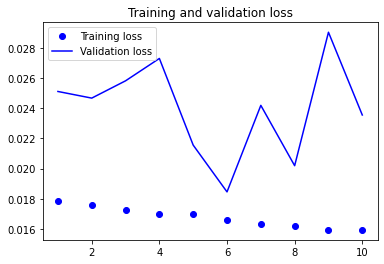

Mean of Training Loss 0.016776430420577526
Mean of Validation Loss 0.023980137147009372


In [ ]:
regularized_overfit_lstm_model = load_model('regularized_overfit_lstm_model/')
loss = regularized_overfit_lstm_history.history['loss']
val_loss = regularized_overfit_lstm_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
print('Mean of Training Loss', np.mean(loss))
print('Mean of Validation Loss', np.mean(val_loss))

It is essential to identify the optimal dropout and recurrent dropout rates to achieve a balance between minimizing overfitting and ensuring strong performance on the validation and test datasets.

In our case, the dropout and recurrent dropout have increased the overfitting instead of decreasing it and this is obvious from the shown curves above where the training loss values are less than the validation loss values from the first epoch till the last one, same goes for the average rates of both sets that increased as well compared to the overfitted and stacked LSTM models.

It is very obvious that the range of RMSE values has increased as well in the training and validation sets.

Let's try the same concept of dropout and recurrent dropout but on our stacked_lstm_model and see the impact on it.

#### 8.2 Dropout on the stacked recurrent model

Below we will pass to our stacked LSTM model, the dropout and recurrent dropout parameters.

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (LSTM)       (None, 5, 512)            1052672   
                                                                 
 lstm_2 (LSTM)               (None, 256)               787456    
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 Output_Layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 1,856,641
Trainable params: 1,856,641
Non-trainable params: 0
_________________________________________________________________
None


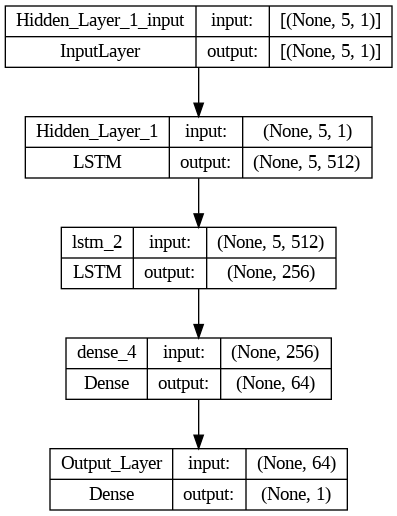

In [ ]:
regularized_stacked_lstm_model = Sequential()
regularized_stacked_lstm_model.add(layers.LSTM(units=512, input_shape=(5,1),return_sequences=True, dropout=0.2, recurrent_dropout=0.3, name='Hidden_Layer_1'))
regularized_stacked_lstm_model.add(layers.LSTM(256, dropout=0.2, recurrent_dropout=0.2, activation='relu'))
regularized_stacked_lstm_model.add(layers.Dense(64, activation='relu'))
regularized_stacked_lstm_model.add(layers.Dense(1, activation='linear', name='Output_Layer'))
print(regularized_stacked_lstm_model.summary())
plot_model(regularized_stacked_lstm_model, show_shapes=True)

In [ ]:
np.random.seed(12345)    #veryy slow
cp1 = ModelCheckpoint('regularized_stacked_lstm_model/', save_best_only=True)
regularized_stacked_lstm_model.compile(optimizer=RMSprop(), loss=MeanAbsoluteError(),  metrics=[RootMeanSquaredError()])
regularized_stacked_lstm_history = regularized_stacked_lstm_model.fit(X_train1, y_train1,epochs=10,validation_data=(X_val1,y_val1),
                    callbacks=[cp1])

Epoch 1/10
1094/1094 [==============================] - ETA: 0s - loss: 0.0249 - root_mean_squared_error: 0.0417

1094/1094 [==============================] - 242s 216ms/step - loss: 0.0249 - root_mean_squared_error: 0.0417 - val_loss: 0.0407 - val_root_mean_squared_error: 0.0534
Epoch 2/10
1094/1094 [==============================] - ETA: 0s - loss: 0.0205 - root_mean_squared_error: 0.0360

1094/1094 [==============================] - 256s 234ms/step - loss: 0.0205 - root_mean_squared_error: 0.0360 - val_loss: 0.0232 - val_root_mean_squared_error: 0.0352
Epoch 3/10
1094/1094 [==============================] - 249s 228ms/step - loss: 0.0194 - root_mean_squared_error: 0.0350 - val_loss: 0.0282 - val_root_mean_squared_error: 0.0398
Epoch 4/10
1094/1094 [==============================] - 252s 231ms/step - loss: 0.0189 - root_mean_squared_error: 0.0346 - val_loss: 0.0329 - val_root_mean_squared_error: 0.0425
Epoch 5/10
1094/1094 [==============================] - 256s 234ms/step - loss: 0.0185 - root_mean_squared_error: 0.0343 - val_loss: 0.0248 - val_root_mean_squared_error: 0.0364
Epoch 6/10
1094/1094 [==============================] - ETA: 0s - loss: 0.0182 - root_mean_squared_error: 0.0348

1094/1094 [==============================] - 256s 234ms/step - loss: 0.0182 - root_mean_squared_error: 0.0348 - val_loss: 0.0204 - val_root_mean_squared_error: 0.0342
Epoch 7/10
1094/1094 [==============================] - 275s 252ms/step - loss: 0.0180 - root_mean_squared_error: 0.0337 - val_loss: 0.0251 - val_root_mean_squared_error: 0.0392
Epoch 8/10
1094/1094 [==============================] - 256s 234ms/step - loss: 0.0177 - root_mean_squared_error: 0.0327 - val_loss: 0.0268 - val_root_mean_squared_error: 0.0405
Epoch 9/10
1094/1094 [==============================] - 250s 229ms/step - loss: 0.0176 - root_mean_squared_error: 0.0335 - val_loss: 0.0220 - val_root_mean_squared_error: 0.0354
Epoch 10/10
1094/1094 [==============================] - 246s 225ms/step - loss: 0.0174 - root_mean_squared_error: 0.0328 - val_loss: 0.0275 - val_root_mean_squared_error: 0.0420


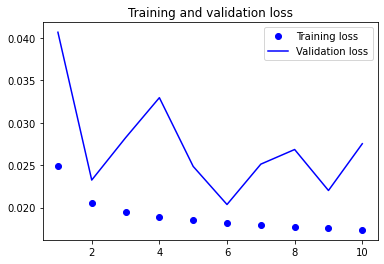

Mean of Training Loss 0.019100671261548997
Mean of Validation Loss 0.027175439335405827


In [ ]:
regularized_stacked_lstm_model = load_model('regularized_stacked_lstm_model/')
loss = regularized_stacked_lstm_history.history['loss']
val_loss = regularized_stacked_lstm_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
print('Mean of Training Loss', np.mean(loss))
print('Mean of Validation Loss', np.mean(val_loss))

The regularization techniques we have used in section 8.1 and 8.2, dropout and recurrent dropout on our overfit_lstm_model and stacked_lstm_model, have increased the loss values and RMSE ranges for both training and validation sets.
In addition, the complexity of these regularized models is very high due to high number of trainable parameters which leads to high time complexity (high execution time) but maybe our computational resources, our machine used to perform this coursework is a factor.


These networks are already fairly complicated and we are not in need of them since we have our basic_lstm_model that performs fairly good, however, we can improve it by tuning its parameters (hyperparameter tuning). But before tuning our basic_lstm_model, let's try to regularize it using dropout and recurrent dropout.   


#### 8.3 Dropout on the basic LSTM model: 


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (LSTM)       (None, 32)                4352      
                                                                 
 Hidden_Layer_2 (Dense)      (None, 8)                 264       
                                                                 
 Output_Layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 4,625
Trainable params: 4,625
Non-trainable params: 0
_________________________________________________________________
None


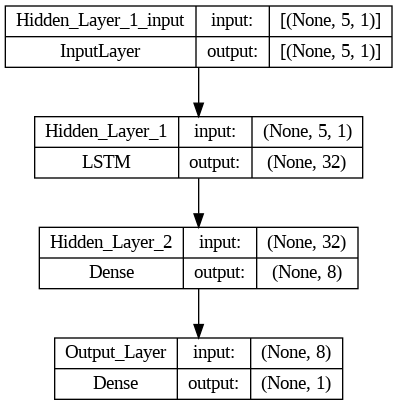

In [ ]:
tf.random.set_seed(13)
regularized_basic_lstm_model = Sequential()
regularized_basic_lstm_model.add(layers.LSTM(units=32, input_shape=(5,1),dropout=0.2, recurrent_dropout=0.3, name='Hidden_Layer_1'))
regularized_basic_lstm_model.add(layers.Dense(8, activation='relu', name='Hidden_Layer_2'))
regularized_basic_lstm_model.add(layers.Dense(1, activation='linear', name='Output_Layer'))
print(regularized_basic_lstm_model.summary())
plot_model(regularized_basic_lstm_model, show_shapes=True)

In [ ]:
tf.random.set_seed(13)
cp1 = ModelCheckpoint('regularized_basic_lstm_model/', save_best_only=True)
regularized_basic_lstm_model.compile(optimizer=RMSprop(), loss=MeanAbsoluteError(),  metrics=[RootMeanSquaredError()])
regularized_basic_lstm_history = regularized_basic_lstm_model.fit(X_train1, y_train1,epochs=10,validation_data=(X_val1,y_val1), callbacks=[cp1])

Epoch 1/10
1093/1094 [============================>.] - ETA: 0s - loss: 0.0273 - root_mean_squared_error: 0.0443

1094/1094 [==============================] - 18s 12ms/step - loss: 0.0273 - root_mean_squared_error: 0.0443 - val_loss: 0.0229 - val_root_mean_squared_error: 0.0380
Epoch 2/10
1091/1094 [============================>.] - ETA: 0s - loss: 0.0268 - root_mean_squared_error: 0.0438

1094/1094 [==============================] - 13s 12ms/step - loss: 0.0268 - root_mean_squared_error: 0.0438 - val_loss: 0.0214 - val_root_mean_squared_error: 0.0357
Epoch 3/10
1094/1094 [==============================] - 9s 9ms/step - loss: 0.0262 - root_mean_squared_error: 0.0430 - val_loss: 0.0245 - val_root_mean_squared_error: 0.0406
Epoch 4/10
1094/1094 [==============================] - 9s 8ms/step - loss: 0.0239 - root_mean_squared_error: 0.0403 - val_loss: 0.0316 - val_root_mean_squared_error: 0.0492
Epoch 5/10
1094/1094 [==============================] - 10s 9ms/step - loss: 0.0225 - root_mean_squared_error: 0.0389 - val_loss: 0.0345 - val_root_mean_squared_error: 0.0537
Epoch 6/10
1094/1094 [==============================] - 10s 9ms/step - loss: 0.0217 - root_mean_squared_error: 0.0381 - val_loss: 0.0382 - val_root_mean_squared_error: 0.0556
Epoch 7/10
1094/1094 [==============================] - 10s 9ms/step - loss: 0.0213 - root_mean_squared_error: 0.0376 - val_loss: 0.0391 

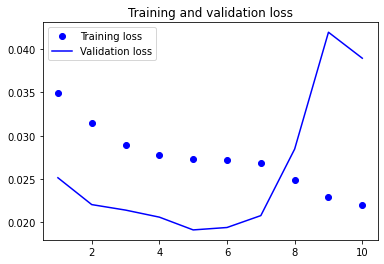

Mean of Training Loss 0.027432379312813282
Mean of Validation Loss 0.02579835932701826


In [ ]:
regularized_basic_lstm_model = load_model('regularized_basic_lstm_model/')
loss = regularized_basic_lstm_history.history['loss']
val_loss = regularized_basic_lstm_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
print('Mean of Training Loss', np.mean(loss))
print('Mean of Validation Loss', np.mean(val_loss))

Although the above graph shows that the loss values of the validation set are lower than the loss values of the training set, however, if we focused on the regularized_basic_lstm_model range of loss values we can notice that they have increased compared to basic_lstm_model range of loss values. Moreover, the RMSE range of values has increased as well compared to the basic_lstm_model. Thus, the dropout techniques applied on our basic_lstm_model didn't lead to a better performance and this could be due to the time series nature of our data. The temporal ordering of the data points is important and the dropout technique does not take it into account.

Therefore, we will stick to our basic_lstm_model developed at the beginning of our coursework in section 6 and below we will apply on it the hyperparameter tuning technique.


 



#### 8.4 Hyperparameter Tuning

When developing a deep-learning model, there are various architecture-level decisions to be made, such as the number of layers, units or filters in each layer, the activation function to be used, and dropout. These decisions are known as hyperparameters and are distinct from the parameters of the model, which are trained through backpropagation. While experienced machine-learning experts can develop intuition over time regarding these choices, there are no formal rules, and initial decisions are often suboptimal. To refine these decisions, machine-learning engineers spend most of their time tweaking and retraining the model. However, this process can be time-consuming and is better left to a machine to explore the space of possible decisions systematically and find the best-performing ones through automatic hyperparameter optimization, which is an important field of research. The values that provide the lowest loss value and the lowest RMSE, will be considered the best set of parameters.

The below function is trying to create a model by passing as inputs two arrays, the number of neurons and different types of loss functions suitable with our task at hand. At the end, we show the epoch value, training and validation loss and root mean squared error as a metric in a tabular format.

In [ ]:
# Function to generate Deep ANN model 
# def create_model(Neurons_Trial):
def create_model(neurons_trial, loss_trial, optimizer):
    basic_lstm_model = Sequential()
    basic_lstm_model.add(layers.LSTM(units=neurons_trial, input_shape=(5,1), name='Hidden_Layer_1'))
    basic_lstm_model.add(layers.Dense(8, activation='relu', name='Hidden_Layer_2'))
    basic_lstm_model.add(layers.Dense(1, activation='linear', name='Output_Layer'))
    basic_lstm_model.compile(optimizer=optimizer, loss=loss_trial,  metrics=[RootMeanSquaredError()])
    return basic_lstm_model

SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Loss', 'root_mean_squared_error', 'Validation_loss', 'Validation_root_mean_squared_error', 'optimizer'])
ParametersGrid={'epochs':[ 15, 20], 'Neurons_Trial': [32,64,128,256], 'loss':[MeanAbsoluteError(), MeanSquaredError()], 'optimizer':[RMSprop(), Adam()]}

TrialNumber=0
for neurons_trial in ParametersGrid.get('Neurons_Trial'):
    for epochs_trial, loss_trial, optimizer in zip(ParametersGrid.get('epochs'),ParametersGrid.get('loss'),ParametersGrid.get('optimizer')):
          TrialNumber+=1
          # print("neurons_trial: "+ neurons_trial,"epochs_trial: " + epochs_trial, "loss_trial: " + loss_trial)
          print("neurons_trial: {}, epochs_trial: {}, loss_trial: {}, optimizer: {} ".format(neurons_trial, epochs_trial, loss_trial,optimizer))
          classifier=create_model(neurons_trial,loss_trial, optimizer)
          tuned_model=classifier.fit(X_train1, y_train1, epochs=epochs_trial, verbose=0, validation_data=(X_val1,y_val1))
          # Fetching the accuracy of the training
          Loss = tuned_model.history['loss'][-1]
          root_mean_squared_error = tuned_model.history['root_mean_squared_error'][-1]
          Validation_loss = tuned_model.history['val_loss'][-1]
          Validation_root_mean_squared_error = tuned_model.history['val_root_mean_squared_error'][-1]
          
          # printing the results of the current iteration
          print(TrialNumber, 'Parameters:','-', 'epochs:',epochs_trial,'Loss: ', Loss,'-', 'root_mean_squared_error:', root_mean_squared_error,'-', 'Validation_loss: ',Validation_loss,'-', 
                'Validation_root_mean_squared_error: ',Validation_root_mean_squared_error, 'optimizer: ', optimizer)
          
          SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,'-'+'epoch'+str(epochs_trial), Loss, root_mean_squared_error, Validation_loss, 
                                                                         Validation_root_mean_squared_error, optimizer]],
           columns=['TrialNumber', 'Parameters', 'Loss', 'root_mean_squared_error', 'Validation_loss', 'Validation_root_mean_squared_error', 'optimizer'] ))
      

print(SearchResultsData)

neurons_trial: 32, epochs_trial: 15, loss_trial: <keras.losses.MeanAbsoluteError object at 0x7ff546413580>, optimizer: <keras.optimizers.optimizer_v2.rmsprop.RMSprop object at 0x7ff5cafa0ee0> 
1 Parameters: - epochs: 15 Loss:  0.013486780226230621 - root_mean_squared_error: 0.02749701961874962 - Validation_loss:  0.013168931938707829 - Validation_root_mean_squared_error:  0.026330197229981422 optimizer:  <keras.optimizers.optimizer_v2.rmsprop.RMSprop object at 0x7ff5cafa0ee0>
neurons_trial: 32, epochs_trial: 20, loss_trial: <keras.losses.MeanSquaredError object at 0x7ff5464343d0>, optimizer: <keras.optimizers.optimizer_v2.adam.Adam object at 0x7ff5474c7e50> 
2 Parameters: - epochs: 20 Loss:  0.0007234952063299716 - root_mean_squared_error: 0.026897866278886795 - Validation_loss:  0.000654935312923044 - Validation_root_mean_squared_error:  0.02559170313179493 optimizer:  <keras.optimizers.optimizer_v2.adam.Adam object at 0x7ff5474c7e50>
neurons_trial: 64, epochs_trial: 15, loss_trial: <

At the beginning of applying hyperparameter tuning technique, we have used larger and more numbers for the epoch however due to the low computational resources of our machine, the RAM memory crashed immediately in the earlier epochs.

Therefore, after many trials, we have reached the best set of params with the following values:

* units value equals to 32
* epoch value equals to 20
* loss function is Mean Squared Error (MSE)
* optimizer is Adam


Hence, our recurrent neural model performs better with the basic_lstm_model which consists of two hidden layers and passing to it the above values. There were also other trials on tuning the activation then passing it to our model, however, the results weren't optimized as expected. The activation parameter increased the execution time and the results weren't worthy to consider. Thus we stick to the above parameters to be tuned.

Let's first train our LSTM model on the best set of parameters mentioned above.




Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (LSTM)       (None, 32)                4352      
                                                                 
 Hidden_Layer_2 (Dense)      (None, 8)                 264       
                                                                 
 Output_Layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 4,625
Trainable params: 4,625
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1090/1094 [============================>.] - ETA: 0s - loss: 0.0014 - root_mean_squared_error: 0.0369

1094/1094 [==============================] - 20s 14ms/step - loss: 0.0014 - root_mean_squared_error: 0.0369 - val_loss: 8.0606e-04 - val_root_mean_squared_error: 0.0284
Epoch 2/20
1091/1094 [============================>.] - ETA: 0s - loss: 8.3441e-04 - root_mean_squared_error: 0.0289

1094/1094 [==============================] - 15s 14ms/step - loss: 8.3389e-04 - root_mean_squared_error: 0.0289 - val_loss: 7.1447e-04 - val_root_mean_squared_error: 0.0267
Epoch 3/20
1087/1094 [============================>.] - ETA: 0s - loss: 7.9807e-04 - root_mean_squared_error: 0.0283

1094/1094 [==============================] - 12s 11ms/step - loss: 7.9616e-04 - root_mean_squared_error: 0.0282 - val_loss: 7.0091e-04 - val_root_mean_squared_error: 0.0265
Epoch 4/20
1092/1094 [============================>.] - ETA: 0s - loss: 7.8186e-04 - root_mean_squared_error: 0.0280

1094/1094 [==============================] - 12s 11ms/step - loss: 7.8167e-04 - root_mean_squared_error: 0.0280 - val_loss: 6.7891e-04 - val_root_mean_squared_error: 0.0261
Epoch 5/20
1094/1094 [==============================] - 8s 7ms/step - loss: 7.7267e-04 - root_mean_squared_error: 0.0278 - val_loss: 6.9323e-04 - val_root_mean_squared_error: 0.0263
Epoch 6/20
1094/1094 [==============================] - ETA: 0s - loss: 7.6998e-04 - root_mean_squared_error: 0.0277

1094/1094 [==============================] - 14s 13ms/step - loss: 7.6998e-04 - root_mean_squared_error: 0.0277 - val_loss: 6.6781e-04 - val_root_mean_squared_error: 0.0258
Epoch 7/20
1088/1094 [============================>.] - ETA: 0s - loss: 7.5380e-04 - root_mean_squared_error: 0.0275

1094/1094 [==============================] - 12s 11ms/step - loss: 7.5545e-04 - root_mean_squared_error: 0.0275 - val_loss: 6.5971e-04 - val_root_mean_squared_error: 0.0257
Epoch 8/20
1094/1094 [==============================] - 7s 7ms/step - loss: 7.5157e-04 - root_mean_squared_error: 0.0274 - val_loss: 6.6274e-04 - val_root_mean_squared_error: 0.0257
Epoch 9/20
1094/1094 [==============================] - 7s 6ms/step - loss: 7.4582e-04 - root_mean_squared_error: 0.0273 - val_loss: 6.9571e-04 - val_root_mean_squared_error: 0.0264
Epoch 10/20
1094/1094 [==============================] - 7s 6ms/step - loss: 7.3550e-04 - root_mean_squared_error: 0.0271 - val_loss: 6.8717e-04 - val_root_mean_squared_error: 0.0262
Epoch 11/20
1093/1094 [============================>.] - ETA: 0s - loss: 7.2936e-04 - root_mean_squared_error: 0.0270

1094/1094 [==============================] - 13s 12ms/step - loss: 7.2899e-04 - root_mean_squared_error: 0.0270 - val_loss: 6.5456e-04 - val_root_mean_squared_error: 0.0256
Epoch 12/20
1094/1094 [==============================] - 7s 6ms/step - loss: 7.2528e-04 - root_mean_squared_error: 0.0269 - val_loss: 6.5907e-04 - val_root_mean_squared_error: 0.0257
Epoch 13/20
1094/1094 [==============================] - 8s 7ms/step - loss: 7.2074e-04 - root_mean_squared_error: 0.0268 - val_loss: 6.5475e-04 - val_root_mean_squared_error: 0.0256
Epoch 14/20
1088/1094 [============================>.] - ETA: 0s - loss: 7.1660e-04 - root_mean_squared_error: 0.0268

1094/1094 [==============================] - 12s 11ms/step - loss: 7.1653e-04 - root_mean_squared_error: 0.0268 - val_loss: 6.4595e-04 - val_root_mean_squared_error: 0.0254
Epoch 15/20
1094/1094 [==============================] - 6s 6ms/step - loss: 7.1687e-04 - root_mean_squared_error: 0.0268 - val_loss: 6.6976e-04 - val_root_mean_squared_error: 0.0259
Epoch 16/20
1085/1094 [============================>.] - ETA: 0s - loss: 7.1376e-04 - root_mean_squared_error: 0.0267

1094/1094 [==============================] - 13s 12ms/step - loss: 7.1322e-04 - root_mean_squared_error: 0.0267 - val_loss: 6.4417e-04 - val_root_mean_squared_error: 0.0254
Epoch 17/20
1094/1094 [==============================] - 8s 8ms/step - loss: 7.1229e-04 - root_mean_squared_error: 0.0267 - val_loss: 6.6326e-04 - val_root_mean_squared_error: 0.0258
Epoch 18/20
1094/1094 [==============================] - 7s 7ms/step - loss: 7.0833e-04 - root_mean_squared_error: 0.0266 - val_loss: 6.5001e-04 - val_root_mean_squared_error: 0.0255
Epoch 19/20
1094/1094 [==============================] - 7s 7ms/step - loss: 7.1000e-04 - root_mean_squared_error: 0.0266 - val_loss: 6.5880e-04 - val_root_mean_squared_error: 0.0257
Epoch 20/20
1092/1094 [============================>.] - ETA: 0s - loss: 7.1220e-04 - root_mean_squared_error: 0.0267

1094/1094 [==============================] - 15s 14ms/step - loss: 7.1176e-04 - root_mean_squared_error: 0.0267 - val_loss: 6.4314e-04 - val_root_mean_squared_error: 0.0254


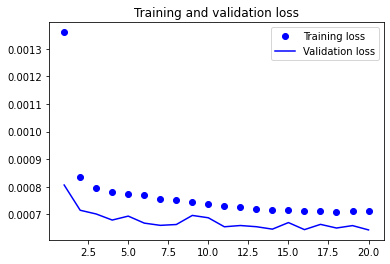

Mean of Training Loss 0.0007733527017990127
Mean of Validation Loss 0.0006755085079930723


In [ ]:
tf.random.set_seed(13)
tuned_basic_lstm_model = Sequential()
tuned_basic_lstm_model.add(layers.LSTM(units=32, input_shape=(5,1), name='Hidden_Layer_1'))
tuned_basic_lstm_model.add(layers.Dense(8, activation='relu', name='Hidden_Layer_2'))
tuned_basic_lstm_model.add(layers.Dense(1, activation='linear', name='Output_Layer'))
print(tuned_basic_lstm_model.summary())
plot_model(tuned_basic_lstm_model, show_shapes=True)
cp1 = ModelCheckpoint('tuned_basic_lstm_model/', save_best_only=True)
tuned_basic_lstm_model.compile(optimizer=Adam(), loss=MeanSquaredError(),  metrics=[RootMeanSquaredError()])
tuned_basic_lstm_history = tuned_basic_lstm_model.fit(X_train1, y_train1,epochs=20,validation_data=(X_val1,y_val1), callbacks=[cp1])
tuned_basic_lstm_model = load_model('tuned_basic_lstm_model/')
loss = tuned_basic_lstm_history.history['loss']
val_loss = tuned_basic_lstm_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
print('Mean of Training Loss', np.mean(loss))
print('Mean of Validation Loss', np.mean(val_loss))

The improvement in the loss values is very clear which reflects in the average rates of training and validation loss values. Our LSTM model is not overfitted anymore.

Before we start to evaluate our model's performance using the test set, let's try another type of recurrent neural network called *CONV1D*.

### 9. Convolutional Neural Network (1D)

Let's first understand the difference bewteen CNN and Conv1D. 


CNN and Conv1D are two types of neural networks that are extensively used in deep learning applications, especially for image and signal processing. 

CNN applies a specific convolutional operation to extract features from two-dimensional input data, such as images, and comprises multiple convolutional layers, followed by pooling and fully connected layers. It is commonly utilized for tasks like image classification, recognition, and segmentation.

 Conversely, Conv1D uses a similar convolutional operation but on one-dimensional input data, such as sequences or signals, and is generally employed for tasks related to natural language processing (NLP), speech processing, and time-series analysis.
 
In summary, the primary difference between CNN and Conv1D is their ability to process input data dimensionality. CNN is suitable for image processing with two-dimensional input data, while Conv1D is appropriate for processing one-dimensional input data such as signals or sequences. However, both CNN and Conv1D use the convolution operation to extract features from the input data, enabling them to be effective in processing data with temporal or spatial dependencies.

We have explained above in section 6, LSTM model. LSTM is suitable for capturing long-term temporal patterns in the data, in other words, is suitable for processing sequential data with long-term dependencies while Conv1D is efficient in processing data with short-term dependencies.

Since our window length is (5,1), which means univariate single step time series forcasting, where the five means the last/previous five hours and the one here means the predicted variable which is the air pollution and this is the variable that we are looking at it five times. So, in our case, the Conv1D could be a suitable recurrent neural network type for our data since it's a short-term dependency (window of size five).

In Conv1D, there is an extra parameter passed called *Kernel*. The kernel parameter is the size of the window that slides over the input data during the convolution operation. The kernel parameter specifies the number of neighboring input elements that are multiplied by the filter weights and added together to create a single output value. The figure below illustrates more how the kernel parameter works during the convolution operation.


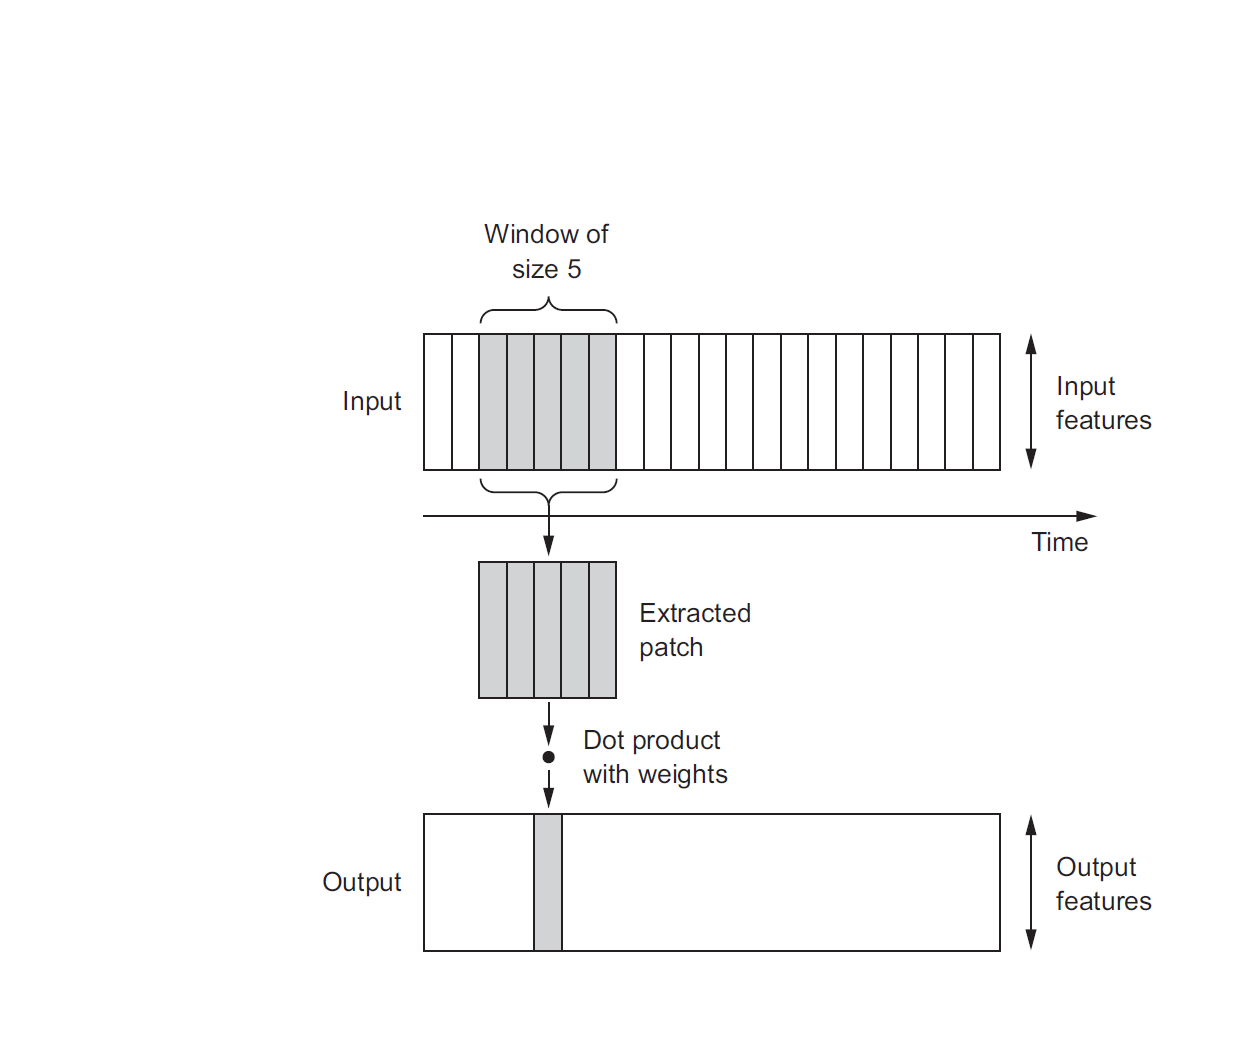

Let's apply Conv1D on our dataset and see the results using the best set of parameters resulted from hyperparameter tuning technique.

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 4, 32)             96        
                                                                 
 flatten_5 (Flatten)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 8)                 1032      
                                                                 
 Output_Layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 1,137
Trainable params: 1,137
Non-trainable params: 0
_________________________________________________________________
None


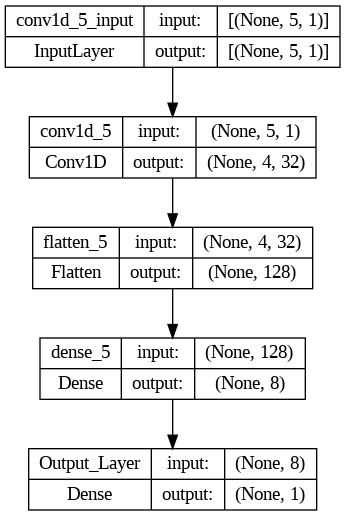

In [ ]:
conv1d_model = Sequential()
conv1d_model.add(layers.Conv1D(32, kernel_size = 2, input_shape=(5,1), activation='relu'))
conv1d_model.add(layers.Flatten())
conv1d_model.add(layers.Dense(8, activation='relu'))
conv1d_model.add(layers.Dense(1, activation='linear', name='Output_Layer'))
print(conv1d_model.summary())
plot_model(conv1d_model, show_shapes=True)

In [ ]:
np.random.seed(12345) 
cp2 = ModelCheckpoint('conv1d_model/', save_best_only=True)
conv1d_model.compile(optimizer=Adam(), loss=MeanSquaredError(),  metrics=[RootMeanSquaredError()])
conv1d_model_history = conv1d_model.fit(X_train1, y_train1,epochs=20,validation_data=(X_val1,y_val1), callbacks=[cp2])

Epoch 1/20
1090/1094 [============================>.] - ETA: 0s - loss: 0.0013 - root_mean_squared_error: 0.0361

1094/1094 [==============================] - 5s 4ms/step - loss: 0.0013 - root_mean_squared_error: 0.0361 - val_loss: 7.2515e-04 - val_root_mean_squared_error: 0.0269
Epoch 2/20
1078/1094 [============================>.] - ETA: 0s - loss: 7.7113e-04 - root_mean_squared_error: 0.0278

1094/1094 [==============================] - 3s 3ms/step - loss: 7.7081e-04 - root_mean_squared_error: 0.0278 - val_loss: 6.9095e-04 - val_root_mean_squared_error: 0.0263
Epoch 3/20
1082/1094 [============================>.] - ETA: 0s - loss: 7.6587e-04 - root_mean_squared_error: 0.0277

1094/1094 [==============================] - 3s 3ms/step - loss: 7.6245e-04 - root_mean_squared_error: 0.0276 - val_loss: 6.8347e-04 - val_root_mean_squared_error: 0.0261
Epoch 4/20
1085/1094 [============================>.] - ETA: 0s - loss: 7.5671e-04 - root_mean_squared_error: 0.0275

1094/1094 [==============================] - 5s 5ms/step - loss: 7.5467e-04 - root_mean_squared_error: 0.0275 - val_loss: 6.5925e-04 - val_root_mean_squared_error: 0.0257
Epoch 5/20
1074/1094 [============================>.] - ETA: 0s - loss: 7.5435e-04 - root_mean_squared_error: 0.0275

1094/1094 [==============================] - 3s 3ms/step - loss: 7.5140e-04 - root_mean_squared_error: 0.0274 - val_loss: 6.5850e-04 - val_root_mean_squared_error: 0.0257
Epoch 6/20
1087/1094 [============================>.] - ETA: 0s - loss: 7.5392e-04 - root_mean_squared_error: 0.0275

1094/1094 [==============================] - 3s 3ms/step - loss: 7.5406e-04 - root_mean_squared_error: 0.0275 - val_loss: 6.4961e-04 - val_root_mean_squared_error: 0.0255
Epoch 7/20
1094/1094 [==============================] - 3s 3ms/step - loss: 7.4046e-04 - root_mean_squared_error: 0.0272 - val_loss: 6.5922e-04 - val_root_mean_squared_error: 0.0257
Epoch 8/20
1093/1094 [============================>.] - ETA: 0s - loss: 7.4563e-04 - root_mean_squared_error: 0.0273

1094/1094 [==============================] - 3s 3ms/step - loss: 7.4563e-04 - root_mean_squared_error: 0.0273 - val_loss: 6.4572e-04 - val_root_mean_squared_error: 0.0254
Epoch 9/20
1094/1094 [==============================] - 2s 2ms/step - loss: 7.3787e-04 - root_mean_squared_error: 0.0272 - val_loss: 7.1356e-04 - val_root_mean_squared_error: 0.0267
Epoch 10/20
1094/1094 [==============================] - 3s 3ms/step - loss: 7.3428e-04 - root_mean_squared_error: 0.0271 - val_loss: 7.3607e-04 - val_root_mean_squared_error: 0.0271
Epoch 11/20
1083/1094 [============================>.] - ETA: 0s - loss: 7.3017e-04 - root_mean_squared_error: 0.0270

1094/1094 [==============================] - 5s 4ms/step - loss: 7.2932e-04 - root_mean_squared_error: 0.0270 - val_loss: 6.4446e-04 - val_root_mean_squared_error: 0.0254
Epoch 12/20
1089/1094 [============================>.] - ETA: 0s - loss: 7.2535e-04 - root_mean_squared_error: 0.0269

1094/1094 [==============================] - 3s 3ms/step - loss: 7.2465e-04 - root_mean_squared_error: 0.0269 - val_loss: 6.4099e-04 - val_root_mean_squared_error: 0.0253
Epoch 13/20
1088/1094 [============================>.] - ETA: 0s - loss: 7.2476e-04 - root_mean_squared_error: 0.0269

1094/1094 [==============================] - 3s 3ms/step - loss: 7.2218e-04 - root_mean_squared_error: 0.0269 - val_loss: 6.4053e-04 - val_root_mean_squared_error: 0.0253
Epoch 14/20
1093/1094 [============================>.] - ETA: 0s - loss: 7.1547e-04 - root_mean_squared_error: 0.0267

1094/1094 [==============================] - 4s 3ms/step - loss: 7.1510e-04 - root_mean_squared_error: 0.0267 - val_loss: 6.3684e-04 - val_root_mean_squared_error: 0.0252
Epoch 15/20
1094/1094 [==============================] - 3s 3ms/step - loss: 7.1725e-04 - root_mean_squared_error: 0.0268 - val_loss: 7.2016e-04 - val_root_mean_squared_error: 0.0268
Epoch 16/20
1094/1094 [==============================] - 2s 2ms/step - loss: 7.1634e-04 - root_mean_squared_error: 0.0268 - val_loss: 6.6055e-04 - val_root_mean_squared_error: 0.0257
Epoch 17/20
1094/1094 [==============================] - 3s 2ms/step - loss: 7.1559e-04 - root_mean_squared_error: 0.0268 - val_loss: 6.8675e-04 - val_root_mean_squared_error: 0.0262
Epoch 18/20
1094/1094 [==============================] - 3s 2ms/step - loss: 7.1515e-04 - root_mean_squared_error: 0.0267 - val_loss: 6.4934e-04 - val_root_mean_squared_error: 0.0255
Epoch 19/20
1094/1094 [==============================] - 3s 3ms/step - loss: 7.1322e-04 - root_me

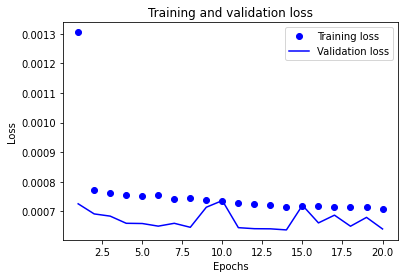

Mean of Training Loss 0.0007617132650921121
Mean of Validation Loss 0.0006710218731313944


In [ ]:
conv1d_model = load_model('conv1d_model/')
loss = conv1d_model_history.history['loss']
val_loss = conv1d_model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print('Mean of Training Loss', np.mean(loss))
print('Mean of Validation Loss', np.mean(val_loss))

As demonstrated from the above graph, the average rates of loss values for both training and validation sets are very similar to the tuned_basic_lstm_model average rates and the values are almost within the same range as well. Same goes to the RMSE range of values which is very similar to the tuned_basic_lstm_model RMSE range of values. Conv1D (conv1d_model) is significantly faster, this is due to the low number of trainable paramters (1,137). The number of trainable parameters has decreased here almost by 25% which leads to lower time complexity (low execution time).

This is a convincing demonstration that a 1D convnet can offer a fast, cheap
alternative to a recurrent network on a time series forecasting task.

Now it's time to evaluate both models, tuned_basic_lstm_model and conv1d_model, using the test set resulted from the holdout validation section. 

### 10. Model Evaluation


#### 10.1 Evaluating the basic LSTM model



In [ ]:
test_loss_score, test_rmse_score = tuned_basic_lstm_model.evaluate(X_test1, y_test1)
print(test_loss_score, test_rmse_score)
results = tuned_basic_lstm_model.evaluate(X_test1, y_test1)
print(results)

138/138 [==============================] - 1s 3ms/step - loss: 4.6436e-04 - root_mean_squared_error: 0.0215
0.0004643569409381598 0.02154894359409809
138/138 [==============================] - 0s 3ms/step - loss: 4.6436e-04 - root_mean_squared_error: 0.0215
[0.0004643569409381598, 0.02154894359409809]


In [ ]:
evaluation_score=mse(y_test1,tuned_basic_lstm_model.predict(X_test1))
print(" Evaluation Score: ",evaluation_score)

138/138 [==============================] - 1s 4ms/step
 Evaluation Score:  0.00046435698118815213


The test-set RMSE turns out to be 0.0215, that’s lower than the training (0.0267) and validation (0.0254) sets RMSE and they are the lowest values that our model was able to reach during the training phase.

 This indicates that when we tuned our basic LSTM model, it performs well on unseen dataset. In addition, the test set loss value (0.00046435)is smaller than the loss of the training (0.00071176) and validation (0.00064314) sets. 

#### 10.2 Evaluating the Conv1D model



In [ ]:
test_loss_score, test_rmse_score = conv1d_model.evaluate(X_test1, y_test1)
print(test_loss_score, test_rmse_score)
results = conv1d_model.evaluate(X_test1, y_test1)
print(results)

138/138 [==============================] - 0s 2ms/step - loss: 4.6226e-04 - root_mean_squared_error: 0.0215
0.0004622572741936892 0.02150016836822033
138/138 [==============================] - 0s 2ms/step - loss: 4.6226e-04 - root_mean_squared_error: 0.0215
[0.0004622572741936892, 0.02150016836822033]


In [ ]:
evaluation_score=mse(y_test1,conv1d_model.predict(X_test1))
print(" Evaluation Score: ",evaluation_score)

138/138 [==============================] - 0s 2ms/step
 Evaluation Score:  0.000462257322612922


The RMSE values of our conv1d_model for both, training and validation sets, are very similar to our tuned_basic_lstm_model RMSE values and for sure the RMSE value for the test set is the same (0.0215), however, the main difference is the time complexity (runtime is faster) as we mentioned above.

### 11. Multivariate Time Series Forcasting

As we have explained before in section 3.3, the difference between univariate and multivariate time series forcasting techniques, here we will move on to 
the multivariate multiple steps. All the features presented in our dataset play a role in determining the amount of pollution in the air,  there are multiple factors influencing the outcome, so let's make use of them.

Rather than just predicting  the level of pollution in the air, we will predict multiple variables at multiple future time steps to make the regression task at hand more interesting and let it touch a little bit the real life. In real life, we need to forecast multiple future time steps using multiple variables based on their past values so we would be able to improve the accuracy of predictions, gain better insights, better understand of trends, and make more comprehensive and informed decisions.

#### 11.1 Multivariate Dataset Preparation


The second approach that we will go for is the multivariate multiple steps time series forecasting. In the below cell, we have used the scaled dataframe that consists of eight features, however for simplicity, we will consider only three out of the eight: 'pressure', 'temperature' and 'pollution'. 

In the below cell, we have created a new dataframe that consists of the three features mentioned above: 'pressure', 'temperature' and 'pollution'. 
Then we will predict these features at multiple future hours.

In [ ]:
multivariate_dataframe = pd.DataFrame({'Pressure':scaled_dataframe['press'], 'Temperature':scaled_dataframe['temp'], 'Pollution':scaled_dataframe['pollution']})

                                      
multivariate_dataframe.index=scaled_dataframe.index
multivariate_dataframe

,Pressure,Temperature,Pollution
date,,,
2010-01-02 00:00:00,0.527273,0.245902,0.129779
2010-01-02 01:00:00,0.527273,0.245902,0.148893
2010-01-02 02:00:00,0.545455,0.229508,0.159960
2010-01-02 03:00:00,0.563636,0.229508,0.182093
2010-01-02 04:00:00,0.563636,0.229508,0.138833
...,...,...,...
2014-12-31 19:00:00,0.781818,0.278689,0.008048
2014-12-31 20:00:00,0.781818,0.262295,0.010060
2014-12-31 21:00:00,0.781818,0.262295,0.010060


In the below cell, we are going to define a function that is very similar to uni_split_sequence() defined in section 3, however, here we will rename it multi_split_sequence() since it will support multiple steps using multiple variables. Therefore, instead of using the previous air pollution values to predict the air pollution for the next hour, we will use an extra couple of features with the air pollution, such as 'pressure' and 'temperature', and then predict the three of them, i.e., for the upcoming 4 hours.

As a side note, we are still predicting the level of pollution in the air at multiple period of time but with the help of multiple features.

In [ ]:
# n_steps_in : Specify how much data we want to look back for prediction
# n_step_out : Specify how much multi-step data we want to forecast

def multi_split_sequences(sequences, n_steps_in, n_steps_out):
 X, y = list(), list()
 df_as_np = sequences.to_numpy()
 for i in range(len(df_as_np)):
  # find the end of this pattern
  end_ix = i + n_steps_in
  out_end_ix = end_ix + n_steps_out-1
  # check if we are beyond the dataset
  if out_end_ix > len(df_as_np):
   break
  # gather input and output parts of the pattern
  seq_x, seq_y = df_as_np[i:end_ix, :], df_as_np[end_ix-1:out_end_ix, -1]
  X.append(seq_x)
  y.append(seq_y)
 return np.array(X), np.array(y)
 
x_train_multi, y_train_multi = multi_split_sequences(multivariate_dataframe, 12, 4)
(x_train_multi.shape, y_train_multi.shape)

((43786, 12, 3), (43786, 4))

Now we have, in the training set, 43786 samples and each sample has 12 timesteps and at each timestep we are collecting 3 measurements (features). In other words, each sample consists of 3 rows and 12 columns (timesteps) and at each column or timestep we are collecting 3 measurements: 'pressure', 'temperature' and 'pollution'. The label data is equivalent to the number of samples and 4 here means that we will predict the next 4 hours for all these 3 features. 

In the below cell, we will apply the holdout validation technique, as applied before in section 3.5, by splitting the above results into training set, validation set and test set using the same percentage.

In [ ]:
X_train2, y_train2 = x_train_multi[:35000], y_train_multi[:35000]
X_val2, y_val2 = x_train_multi[35000:39400], y_train_multi[35000:39400]
X_test2, y_test2 = x_train_multi[39400:], y_train_multi[39400:]
(X_train2.shape, y_train2.shape, X_val2.shape, y_val2.shape, X_test2.shape, y_test2.shape)

((35000, 12, 3),
 (35000, 4),
 (4400, 12, 3),
 (4400, 4),
 (4386, 12, 3),
 (4386, 4))

#### 11.2 Multivariate LSTM Model

Let's apply our tuned LSTM model on the multivariate dataset and see if the best set of parameters resulted while applying hyperparameter tuning work well with the multivariate dataset.

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (LSTM)       (None, 32)                4608      
                                                                 
 Hidden_Layer_3 (Dense)      (None, 8)                 264       
                                                                 
 Output_Layer (Dense)        (None, 4)                 36        
                                                                 
Total params: 4,908
Trainable params: 4,908
Non-trainable params: 0
_________________________________________________________________
None


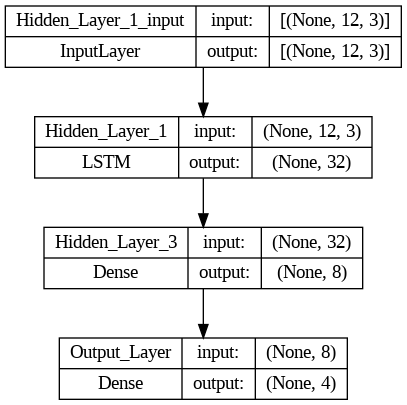

In [ ]:
tf.random.set_seed(13)
tuned_basic_lstm_model = Sequential()
tuned_basic_lstm_model.add(layers.LSTM(units=32, input_shape=(12,3), name='Hidden_Layer_1'))
tuned_basic_lstm_model.add(layers.Dense(8, activation='relu', name='Hidden_Layer_3'))
tuned_basic_lstm_model.add(layers.Dense(4, activation='linear', name='Output_Layer'))
print(tuned_basic_lstm_model.summary())
plot_model(tuned_basic_lstm_model, show_shapes=True)


We can notice that the number of trainable parameters has slightly increased compared to the univariate tuned LSTM model from 4,625 to 4,908 which is not a huge increase and won't affect the execution time that much. However, this is due to the window size that has increased from 5 to 12 and the future hours that we want to predict, 4 hours instead of 1 hour.

In [ ]:
cp1 = ModelCheckpoint('tuned_basic_lstm_model/', save_best_only=True)
tuned_basic_lstm_model.compile(optimizer=Adam(), loss=MeanSquaredError(),  metrics=[RootMeanSquaredError()])
tuned_basic_lstm_history = tuned_basic_lstm_model.fit(X_train2, y_train2,epochs=20,validation_data=(X_val2,y_val2), callbacks=[cp1])

Epoch 1/20
1094/1094 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0498

1094/1094 [==============================] - 15s 12ms/step - loss: 0.0025 - root_mean_squared_error: 0.0498 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0338
Epoch 2/20
1092/1094 [============================>.] - ETA: 0s - loss: 0.0012 - root_mean_squared_error: 0.0343

1094/1094 [==============================] - 13s 12ms/step - loss: 0.0012 - root_mean_squared_error: 0.0343 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0323
Epoch 3/20
1094/1094 [==============================] - 9s 8ms/step - loss: 0.0011 - root_mean_squared_error: 0.0338 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0333
Epoch 4/20
1091/1094 [============================>.] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0336

1094/1094 [==============================] - 13s 12ms/step - loss: 0.0011 - root_mean_squared_error: 0.0336 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0318
Epoch 5/20
1094/1094 [==============================] - 9s 8ms/step - loss: 0.0011 - root_mean_squared_error: 0.0334 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0319
Epoch 6/20
1089/1094 [============================>.] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0333

1094/1094 [==============================] - 14s 13ms/step - loss: 0.0011 - root_mean_squared_error: 0.0333 - val_loss: 9.9527e-04 - val_root_mean_squared_error: 0.0315
Epoch 7/20
1094/1094 [==============================] - 9s 8ms/step - loss: 0.0011 - root_mean_squared_error: 0.0331 - val_loss: 9.9718e-04 - val_root_mean_squared_error: 0.0316
Epoch 8/20
1094/1094 [==============================] - 9s 8ms/step - loss: 0.0011 - root_mean_squared_error: 0.0328 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0318
Epoch 9/20
1094/1094 [==============================] - 9s 8ms/step - loss: 0.0011 - root_mean_squared_error: 0.0326 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0318
Epoch 10/20
1089/1094 [============================>.] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0324

1094/1094 [==============================] - 15s 13ms/step - loss: 0.0011 - root_mean_squared_error: 0.0325 - val_loss: 9.7409e-04 - val_root_mean_squared_error: 0.0312
Epoch 11/20
1094/1094 [==============================] - 9s 8ms/step - loss: 0.0010 - root_mean_squared_error: 0.0322 - val_loss: 9.8171e-04 - val_root_mean_squared_error: 0.0313
Epoch 12/20
1088/1094 [============================>.] - ETA: 0s - loss: 0.0010 - root_mean_squared_error: 0.0321

1094/1094 [==============================] - 13s 12ms/step - loss: 0.0010 - root_mean_squared_error: 0.0321 - val_loss: 9.5812e-04 - val_root_mean_squared_error: 0.0310
Epoch 13/20
1094/1094 [==============================] - 9s 8ms/step - loss: 0.0010 - root_mean_squared_error: 0.0319 - val_loss: 9.8598e-04 - val_root_mean_squared_error: 0.0314
Epoch 14/20
1094/1094 [==============================] - 9s 8ms/step - loss: 0.0010 - root_mean_squared_error: 0.0319 - val_loss: 9.6007e-04 - val_root_mean_squared_error: 0.0310
Epoch 15/20
1091/1094 [============================>.] - ETA: 0s - loss: 0.0010 - root_mean_squared_error: 0.0318

1094/1094 [==============================] - 13s 12ms/step - loss: 0.0010 - root_mean_squared_error: 0.0318 - val_loss: 9.5003e-04 - val_root_mean_squared_error: 0.0308
Epoch 16/20
1094/1094 [==============================] - 9s 9ms/step - loss: 0.0010 - root_mean_squared_error: 0.0316 - val_loss: 9.8210e-04 - val_root_mean_squared_error: 0.0313
Epoch 17/20
1094/1094 [==============================] - 9s 8ms/step - loss: 0.0010 - root_mean_squared_error: 0.0316 - val_loss: 9.9405e-04 - val_root_mean_squared_error: 0.0315
Epoch 18/20
1094/1094 [==============================] - 9s 8ms/step - loss: 9.9392e-04 - root_mean_squared_error: 0.0315 - val_loss: 9.8180e-04 - val_root_mean_squared_error: 0.0313
Epoch 19/20
1094/1094 [==============================] - 9s 8ms/step - loss: 9.9557e-04 - root_mean_squared_error: 0.0316 - val_loss: 9.7638e-04 - val_root_mean_squared_error: 0.0312
Epoch 20/20
1093/1094 [============================>.] - ETA: 0s - loss: 9.9049e-04 - root_mean_squared_err

1094/1094 [==============================] - 13s 12ms/step - loss: 9.9016e-04 - root_mean_squared_error: 0.0315 - val_loss: 9.4065e-04 - val_root_mean_squared_error: 0.0307


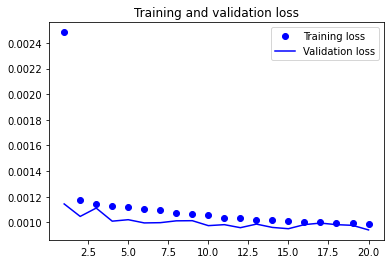

Mean of Training Loss 0.0011263481050264091
Mean of Validation Loss 0.0010015997831942514


In [ ]:
tuned_basic_lstm_model = load_model('tuned_basic_lstm_model/')
loss = tuned_basic_lstm_history.history['loss']
val_loss = tuned_basic_lstm_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
print('Mean of Training Loss', np.mean(loss))
print('Mean of Validation Loss', np.mean(val_loss))

As shown above, the multivariate LSTM model has higher loss values for both the training and validation sets compared to the univariate tuned LSTM model. The minimum validation loss achieved by the multivariate LSTM model was 0.0009458, while the univariate LSTM model reached a minimum validation loss of 0.00064314. 

Additionally, the range of RMSE values for the validation set is wider, with the univariate LSTM model achieving a minimum RMSE value of 0.0254, compared to the multivariate LSTM model's minimum RMSE value of 0.0308.

Before evaluating our multivariate LSTM model on our test set, let's see the performance of Conv1D on the multivariate dataset.

#### 11.3 Multivariate Conv1D Model



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 8, 32)             512       
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 2056      
                                                                 
 Output_Layer (Dense)        (None, 4)                 36        
                                                                 
Total params: 2,604
Trainable params: 2,604
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1090/1094 [============================>.] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.0441

1094/1094 [==============================] - 4s 3ms/step - loss: 0.0019 - root_mean_squared_error: 0.0440 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0338
Epoch 2/20
1083/1094 [============================>.] - ETA: 0s - loss: 0.0012 - root_mean_squared_error: 0.0344

1094/1094 [==============================] - 3s 3ms/step - loss: 0.0012 - root_mean_squared_error: 0.0344 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0322
Epoch 3/20
1094/1094 [==============================] - 2s 2ms/step - loss: 0.0011 - root_mean_squared_error: 0.0338 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0329
Epoch 4/20
1080/1094 [============================>.] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0336

1094/1094 [==============================] - 3s 3ms/step - loss: 0.0011 - root_mean_squared_error: 0.0335 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0318
Epoch 5/20
1094/1094 [==============================] - 3s 2ms/step - loss: 0.0011 - root_mean_squared_error: 0.0333 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0329
Epoch 6/20
1076/1094 [============================>.] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0332

1094/1094 [==============================] - 3s 3ms/step - loss: 0.0011 - root_mean_squared_error: 0.0332 - val_loss: 9.8625e-04 - val_root_mean_squared_error: 0.0314
Epoch 7/20
1094/1094 [==============================] - 2s 2ms/step - loss: 0.0011 - root_mean_squared_error: 0.0330 - val_loss: 9.8956e-04 - val_root_mean_squared_error: 0.0315
Epoch 8/20
1094/1094 [==============================] - 2s 2ms/step - loss: 0.0011 - root_mean_squared_error: 0.0328 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0325
Epoch 9/20
1085/1094 [============================>.] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0326

1094/1094 [==============================] - 3s 3ms/step - loss: 0.0011 - root_mean_squared_error: 0.0326 - val_loss: 9.8294e-04 - val_root_mean_squared_error: 0.0314
Epoch 10/20
1084/1094 [============================>.] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0326

1094/1094 [==============================] - 4s 3ms/step - loss: 0.0011 - root_mean_squared_error: 0.0326 - val_loss: 9.7793e-04 - val_root_mean_squared_error: 0.0313
Epoch 11/20
1094/1094 [==============================] - 4s 4ms/step - loss: 0.0010 - root_mean_squared_error: 0.0324 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0316
Epoch 12/20
1094/1094 [==============================] - 3s 3ms/step - loss: 0.0010 - root_mean_squared_error: 0.0324 - val_loss: 9.8589e-04 - val_root_mean_squared_error: 0.0314
Epoch 13/20
1094/1094 [==============================] - 3s 3ms/step - loss: 0.0010 - root_mean_squared_error: 0.0323 - val_loss: 9.8921e-04 - val_root_mean_squared_error: 0.0315
Epoch 14/20
1077/1094 [============================>.] - ETA: 0s - loss: 0.0010 - root_mean_squared_error: 0.0322

1094/1094 [==============================] - 3s 3ms/step - loss: 0.0010 - root_mean_squared_error: 0.0322 - val_loss: 9.5343e-04 - val_root_mean_squared_error: 0.0309
Epoch 15/20
1078/1094 [============================>.] - ETA: 0s - loss: 0.0010 - root_mean_squared_error: 0.0322

1094/1094 [==============================] - 3s 3ms/step - loss: 0.0010 - root_mean_squared_error: 0.0323 - val_loss: 9.5019e-04 - val_root_mean_squared_error: 0.0308
Epoch 16/20
1094/1094 [==============================] - 2s 2ms/step - loss: 0.0010 - root_mean_squared_error: 0.0322 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0320
Epoch 17/20
1094/1094 [==============================] - 3s 3ms/step - loss: 0.0010 - root_mean_squared_error: 0.0322 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0324
Epoch 18/20
1094/1094 [==============================] - 2s 2ms/step - loss: 0.0010 - root_mean_squared_error: 0.0321 - val_loss: 9.8168e-04 - val_root_mean_squared_error: 0.0313
Epoch 19/20
1094/1094 [==============================] - 2s 2ms/step - loss: 0.0010 - root_mean_squared_error: 0.0321 - val_loss: 9.8208e-04 - val_root_mean_squared_error: 0.0313
Epoch 20/20
1094/1094 [==============================] - 2s 2ms/step - loss: 0.0010 - root_mean_squared_error: 0.0321 - val_l

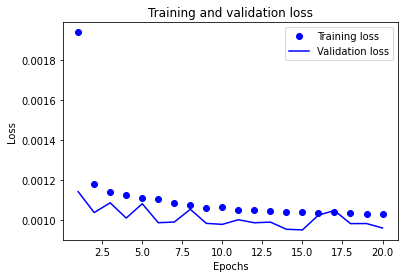

Mean of Training Loss 0.0011137779627460986
Mean of Validation Loss 0.0010109371913131326


In [ ]:
conv1d_model = Sequential()
conv1d_model.add(layers.Conv1D(32, kernel_size = 5, input_shape=(12,3), activation='relu'))
conv1d_model.add(layers.Flatten())
conv1d_model.add(layers.Dense(8, activation='relu'))
conv1d_model.add(layers.Dense(4, activation='linear', name='Output_Layer'))
print(conv1d_model.summary())
plot_model(conv1d_model, show_shapes=True)
np.random.seed(12345) 
cp2 = ModelCheckpoint('conv1d_model/', save_best_only=True)
conv1d_model.compile(optimizer=Adam(), loss=MeanSquaredError(),  metrics=[RootMeanSquaredError()])
conv1d_model_history = conv1d_model.fit(X_train2, y_train2,epochs=20,validation_data=(X_val2,y_val2), callbacks=[cp2])
conv1d_model = load_model('conv1d_model/')
loss = conv1d_model_history.history['loss']
val_loss = conv1d_model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print('Mean of Training Loss', np.mean(loss))
print('Mean of Validation Loss', np.mean(val_loss))

Despite the fact that Conv1D model is faster than LSTM model but when dealing with multivariate dataset, both of them have almost the same performance in terms of loss and RMSE values.
 Additionally, the average rates of loss values are almost the same. 

 Let's emphasize our interpretation while evaluating them.

#### 11.4 Evaluating Multivariate Models

##### 11.4.1 Multivariate LSTM Model Evaluation

In [ ]:
test_loss_score, test_rmse_score = tuned_basic_lstm_model.evaluate(X_test2, y_test2)
print(test_loss_score, test_rmse_score)
results = tuned_basic_lstm_model.evaluate(X_test2, y_test2)
print(results)

138/138 [==============================] - 1s 4ms/step - loss: 7.5953e-04 - root_mean_squared_error: 0.0276
0.0007595312199555337 0.027559593319892883
138/138 [==============================] - 1s 4ms/step - loss: 7.5953e-04 - root_mean_squared_error: 0.0276
[0.0007595312199555337, 0.027559593319892883]


In [ ]:
evaluation_score=mse(y_test2,tuned_basic_lstm_model.predict(X_test2))
print(" Evaluation Score: ",evaluation_score)

138/138 [==============================] - 1s 4ms/step
 Evaluation Score:  0.0007595311234982727


It was expected that the multivariate LSTM model scores higher values than the univariate LSTM model for the RMSE and the loss while evaluating it on unseen dataset.

The multivariate LSTM model scored 0.0276 while the univariate LSTM model scored 0.0215 for RMSE. The lowest loss value of the multivariate LSTM model was 0.00075953 while the loswest loss value of the univariate LSTM model was 0.00046435. 

##### 11.4.2 Multivariate Conv1D Model Evaluation

In [ ]:
test_loss_score, test_rmse_score = conv1d_model.evaluate(X_test2, y_test2)
print(test_loss_score, test_rmse_score)
results = conv1d_model.evaluate(X_test2, y_test2)
print(results)

138/138 [==============================] - 0s 1ms/step - loss: 7.5997e-04 - root_mean_squared_error: 0.0276
0.0007599726668559015 0.027567600831389427
138/138 [==============================] - 0s 2ms/step - loss: 7.5997e-04 - root_mean_squared_error: 0.0276
[0.0007599726668559015, 0.027567600831389427]


In [ ]:
evaluation_score=mse(y_test2,conv1d_model.predict(X_test2))
print(" Evaluation Score: ",evaluation_score)

138/138 [==============================] - 1s 3ms/step
 Evaluation Score:  0.0007599726393135059


The multivariate Conv1D model had a similar performance to the multivariate LSTM model while evaluating it on the unseen dataset.

### 12. Conclusion


#### 12.1 Evaluation


In a conclusion, the performance of our Conv1D model on the univariate dataset was relatively better than the performance of the LSTM model and this is due to its simpler architecture which makes it easier and faster to compute. Moreover, a  Conv1D layer's output at a particular time step only relies on a limited input window around that step, whereas an LSTM layer's output at a given time step depends on all preceding time steps. Both of them had almost very similar results, however, since in our case, we are capturing a small window size (history) and predicting small future timesteps so it would be better to go for the Conv1D model to save a little bit some of the machine's resources.  In future work, or to be more specific in real life, the captured window (history) and the desired future timesteps to be predicted are bigger, however, here in this report we intended to illustrate how these models work, what they are good at using univariate and multivariate dataset and how can we regularize them in case of overfitting.  

It's worth mentioning that the performance of our tuned LSTM and Conv1D models on a multivariate dataset was poorer compared to their performance on a univariate dataset, this could be due that our hyperparameter tuning process needed to be more robust but maybe the computational resources of our machine didn't allow this. In future work, we will need to regularize our models to enhance their performance on a multivariate dataset.


It should be noted that the effectiveness of Conv1D and LSTM layers varies depending on the nature of the data being analyzed and the specific application. In certain instances, LSTM layers may be better suited for processing sequential data and attaining greater accuracy, even if they take longer to execute than Conv1D layers.



#### 12.2 Summary and conclusions


To summarize, our models have performed on average relative to other projects conducted using the same dataset. Our models however were able to compare the results between different RNN approaches and architectures. We have also conducted two different techniques to prevent overfitting: dropout and hyperparameter tuning, to provide the optimum architecture with the optimum results which may help later on scientists to find more accurate results. Moreover, most works on our dataset were confined to using RMSE as a metric to evaluate performance. We also provided an elaborate visualization which may help bridge the gap between data scientists and laymen as it's always a problem of explaining how the model works abstractly to business people.

Our project is transferable to different domain-specific areas other than just merely air pollution regression as it could be utilized in a wide array of different aspects of time series forecasting. As we have made a regression on numerical vectors that are abundant in most time series datasets. Our models could be replicated using different programming languages such as R and Julia as they share the same logic which could be a task for the future. The downside of our models may be due to the small window size and small future timesteps to be predicted we have used. Also, deep learning techniques require high computational power which may not be available at most of the people.

All in all, we have provided a thorough comparison between different RNNs architectures that could be expanded into the future.

### References


1.  Zach. (2022, April). Univariate vs. Multivariate Analysis: What’s the Difference? - Statology. https://www.statology.org/univariate-vs-multivariate-analysis/

2.  Harsha, A. (2022, December). The Ultimate Showdown: RNN vs LSTM vs GRU - Which is the Best? - Naukri Learning. https://www.naukri.com/learning/articles/rnn-vs-gru-vs-lstm/

3. Verma, S. (2019, September). Understanding 1D and 3D Convolution Neural Network | Keras | by Shiva Verma | Towards Data Science. https://towardsdatascience.com/understanding-1d-and-3d-convolution-neural-network-keras-9d8f76e29610

4. Mohar, G. (2019, May). Time series forecasting using LSTM | Kaggle. https://www.kaggle.com/code/gurpreetmohaar/time-series-forecasting-using-lstm/notebook

5. Sreenivas, V. (2020, March). Air index prediction via LSTM with visualizations | Kaggle. https://www.kaggle.com/code/vishnukanduri/air-index-prediction-via-lstm-with-visualizations

6. Sharma, P. (2021, March). LSTM Models for Time Series Forecasting | Kaggle. https://www.kaggle.com/code/pawan2905/lstm-models-for-time-series-forecasting#CNN-LSTM

7. Jethva, M. (2020, March). Time series forecasting with LSTM for uni-multivar | Kaggle. https://www.kaggle.com/code/mineshjethva/time-series-forecasting-with-lstm-for-uni-multivar/notebook#Time-series-weather-forecasting

8. Roy, R. (2022, March). lstm_multivariate | Kaggle. https://www.kaggle.com/code/rupakroy/lstm-multivariate

9. Roy, R. (2022, March). lstm_multivariate_multistep_forecasting | Kaggle. https://www.kaggle.com/code/rupakroy/lstm-multivariate-multistep-forecasting

10. Bavana, S. (n.d.). multivariate time series using LSTMs | Kaggle. Retrieved March 20, 2023, from https://www.kaggle.com/code/sreevaatsavbavana/multivariate-time-series-using-lstms#Air-pollution-forecasting-using-LSTMs

11. Ceresa, N. (2022, September). Beijing Pollution Time Series Forecast | Kaggle. https://www.kaggle.com/code/nicoceresa/beijing-pollution-time-series-forecast

12. Ceresa, N. (2022, September). Pollution Forecast 2 | Kaggle. https://www.kaggle.com/code/nicoceresa/pollution-forecast-2#Create-a-basic-LSTM-model

13. Sharma, P. (2023, January). LSTM Implementation on Air Pollution Prediction | Kaggle. https://www.kaggle.com/code/piyusharma/lstm-implementation-on-air-pollution-prediction

14. Roy, R. (n.d.). Air Pollution Forecasting - LSTM Multivariate | Kaggle. Retrieved March 20, 2023, from https://www.kaggle.com/datasets/rupakroy/lstm-datasets-multivariate-univariate?resource=download
